### Maching Learning. Lab 1

### Dataset: Used Cars <br>
https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices

#### Sokolova Irina 22MAG-IAD

In [162]:
import pandas as pd
import numpy as np
import time     

import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [165]:
dg=pd.read_csv('autos.csv')

In [166]:
dg

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,...,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,...,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,...,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,...,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


Так как объем данных был достаточно велик, я выбрала случайные 10% от всего объема, содержание которых не сильно отличаются от исходного датасета.

In [167]:
#10% of the dataframe
#df_10percent = dg.sample(frac=0.1)

In [168]:
# df_10percent.to_csv("autos_10percent.csv", sep=',', index = None, header=True, encoding='utf-8')
# df_10percent

In [169]:
df_10percent=pd.read_csv('autos_10percent.csv')
df_10percent

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,272225,2016-03-31 12:54:36,Vw_Golf_3_1_8_mit_Klimaanlage,privat,Angebot,700,test,limousine,1997,manuell,...,golf,90000,7,benzin,volkswagen,nein,2016-03-31 00:00:00,0,58300,2016-04-06 05:44:24
1,228038,2016-04-03 22:36:19,Opel_Insignia_2.8_Turbo_4x4_Aut._Sport,privat,Angebot,10990,control,limousine,2008,automatik,...,insignia,125000,12,benzin,opel,nein,2016-04-03 00:00:00,0,25436,2016-04-06 01:45:13
2,206937,2016-03-15 21:50:23,Smart_smart_fortwo_coupe_softouch_passion_micr...,privat,Angebot,7350,control,kleinwagen,2011,NaN,...,fortwo,30000,11,benzin,smart,nein,2016-03-15 00:00:00,0,30853,2016-04-07 07:17:38
3,205584,2016-03-10 22:54:30,MINI_One_Cabrio,privat,Angebot,8800,control,cabrio,2008,manuell,...,one,125000,3,benzin,mini,nein,2016-03-10 00:00:00,0,76133,2016-03-18 04:15:19
4,19579,2016-03-27 19:25:18,Audi_a4_b6_8e_1.9_Tdi_S_line,privat,Angebot,5500,test,kombi,2004,automatik,...,a4,150000,10,diesel,audi,nein,2016-03-27 00:00:00,0,55270,2016-04-06 00:44:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37148,121735,2016-03-09 00:36:22,Mercedes_Benz_C_220_CDI_DPF,privat,Angebot,10999,test,limousine,2007,manuell,...,c_klasse,150000,5,diesel,mercedes_benz,nein,2016-03-09 00:00:00,0,31226,2016-03-09 16:16:13
37149,24903,2016-03-07 15:47:49,Ford_Mondeo_Turnier_2.0_TDCi,privat,Angebot,3250,control,kombi,2007,manuell,...,mondeo,150000,3,diesel,ford,nein,2016-03-07 00:00:00,0,68167,2016-03-11 03:15:47
37150,136102,2016-03-29 23:57:29,Alfa_Romeo_156_2.0_T.Spark_155PS__SCHLACHTFEST...,privat,Angebot,1,control,limousine,1998,manuell,...,156,150000,0,benzin,alfa_romeo,ja,2016-03-29 00:00:00,0,58769,2016-04-01 01:17:32
37151,190669,2016-03-09 02:02:33,Renault_R_19_Cabriolet_1.8_Karmann,privat,Angebot,900,control,cabrio,1995,manuell,...,r19,150000,6,benzin,renault,nein,2016-03-09 00:00:00,0,76316,2016-04-07 06:45:57


In [170]:
df = df_10percent.copy(deep=True)

### EDA

'index', 'dateCrawled', 'seller','offerType', 'abtest', 'lastSeen', 'nrOfPictures', 'dateCreated', 'name', 'postalCode', 'monthOfRegistration'

index = номер объявления по порядку начиная с 0 <br>
dateCrawled = дата размещения <br>
name = название автомобиля <br>
seller = Тип продавца (частное объявление или диллер) <br>
offerType = Тип предложения (продажа, ремонт и т.д.) <br>
price = собственно цена (target для регрессии) <br>
abtest = test/control <br>
vehicleType = тип автомобиля (седан, универсал и т.д.) <br>
yearOfRegistration = год регистрации <br>
gearbox = тип коробки передач (ручная, автоматическая) <br>
powerPS = мощность автомобиля <br>
model = модель автомобиля (target для классификации)<br>
kilometer = пробег <br>
monthOfRegistration = месяц когда автомобиль был зарегистрирован <br>
fuelType = тип топлива (бензин, дизель, газ и т.д.) <br>
brand = марка автомобиля <br>
notRepairedDamage = наличие повреждений, которые не были устранены <br>
dateCreated = дата выпуска автомобиля <br>
nrOfPictures = количество фотографий автомобиля <br>
postalCode = почтовый индекс авто <br>
lastSeen = дата когда, машину было видно последний раз <br>

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                37153 non-null  int64 
 1   dateCrawled          37153 non-null  object
 2   name                 37153 non-null  object
 3   seller               37153 non-null  object
 4   offerType            37153 non-null  object
 5   price                37153 non-null  int64 
 6   abtest               37153 non-null  object
 7   vehicleType          33394 non-null  object
 8   yearOfRegistration   37153 non-null  int64 
 9   gearbox              35173 non-null  object
 10  powerPS              37153 non-null  int64 
 11  model                35096 non-null  object
 12  kilometer            37153 non-null  int64 
 13  monthOfRegistration  37153 non-null  int64 
 14  fuelType             33790 non-null  object
 15  brand                37153 non-null  object
 16  notR

In [172]:
#dateCrawled, dateCreated, lastSeen преобразуем в datetime
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                37153 non-null  int64         
 1   dateCrawled          37153 non-null  datetime64[ns]
 2   name                 37153 non-null  object        
 3   seller               37153 non-null  object        
 4   offerType            37153 non-null  object        
 5   price                37153 non-null  int64         
 6   abtest               37153 non-null  object        
 7   vehicleType          33394 non-null  object        
 8   yearOfRegistration   37153 non-null  int64         
 9   gearbox              35173 non-null  object        
 10  powerPS              37153 non-null  int64         
 11  model                35096 non-null  object        
 12  kilometer            37153 non-null  int64         
 13  monthOfRegistration  37153 non-

In [173]:
df.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,37153.000000,3.715300e+04,37153.000000,37153.000000,37153.000000,37153.000000,37153.0,37153.000000
mean,186099.319893,1.416858e+04,2004.199822,115.771862,125194.869862,5.749899,0.0,50947.145695
std,107113.973299,9.004138e+05,88.217570,184.490803,40344.573660,3.701473,0.0,25685.054342
min,17.000000,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,93633.000000,1.150000e+03,1999.000000,70.000000,100000.000000,3.000000,0.0,30890.000000
50%,186022.000000,2.990000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49762.000000
75%,278830.000000,7.199000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71364.000000
max,371526.000000,1.000000e+08,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Уже видны выбросы в данных (год регистрации 9999, мощность максимальная и минимальная), а также большой разброс в цене.

In [174]:
df.shape

(37153, 21)

### Обработка пропусков

In [175]:
#посчитаем отсутствующие значения
df.isnull().sum().sort_values(ascending=False)

notRepairedDamage      7164
vehicleType            3759
fuelType               3363
model                  2057
gearbox                1980
index                     0
kilometer                 0
postalCode                0
nrOfPictures              0
dateCreated               0
brand                     0
monthOfRegistration       0
powerPS                   0
dateCrawled               0
yearOfRegistration        0
abtest                    0
price                     0
offerType                 0
seller                    0
name                      0
lastSeen                  0
dtype: int64

In [176]:
#процентное соотношение пропущенных значений в одном признаке, по отношению ко всему датасету
pers_of_miss_val = df.isnull().sum().sort_values(ascending=False) * 100 / len(df)
pers_of_miss_val

notRepairedDamage      19.282427
vehicleType            10.117622
fuelType                9.051759
model                   5.536565
gearbox                 5.329314
index                   0.000000
kilometer               0.000000
postalCode              0.000000
nrOfPictures            0.000000
dateCreated             0.000000
brand                   0.000000
monthOfRegistration     0.000000
powerPS                 0.000000
dateCrawled             0.000000
yearOfRegistration      0.000000
abtest                  0.000000
price                   0.000000
offerType               0.000000
seller                  0.000000
name                    0.000000
lastSeen                0.000000
dtype: float64

In [177]:
fig = px.bar(x=pers_of_miss_val.index,
             y=pers_of_miss_val,
             title= "Процент пропущенных значений в датасете подержанных автомобилей",
             labels={"x" : "Колонки", "y" : "Процент пропущенных значений"})
fig.update_traces(marker_color = "red")
fig.show()

В данных достаточно много пропущенных значений, а именно в признаках: notRepairedDamage, vehicleType, fuelType, model, gearbox. <br> 
Обработаем пропущенные значения

In [178]:
#Пропуски заполняем наиболее часто встречающимеся значениями

most_freq = df["notRepairedDamage"].value_counts(ascending=False).index[0]
print('наиболее встречающееся значения для notRepairedDamage = ',  most_freq)
df["notRepairedDamage"].fillna(most_freq, inplace=True)

most_freq = df["vehicleType"].value_counts(ascending=False).index[0]
print('наиболее встречающееся значения для vehicleType = ',  most_freq)
df["vehicleType"].fillna(most_freq, inplace=True)

most_freq = df["fuelType"].value_counts(ascending=False).index[0]
print('наиболее встречающееся значения для fuelType = ',  most_freq)
df["fuelType"].fillna(most_freq, inplace=True)

most_freq = df["gearbox"].value_counts(ascending=False).index[0]
print('наиболее встречающееся значения для gearbox = ',  most_freq)
df["gearbox"].fillna(most_freq, inplace=True)

#Пропуски в model установим как - "unknown"
df["model"].fillna("unknown", inplace=True)

наиболее встречающееся значения для notRepairedDamage =  nein
наиболее встречающееся значения для vehicleType =  limousine
наиболее встречающееся значения для fuelType =  benzin
наиболее встречающееся значения для gearbox =  manuell


### Поиск дубликатов (не оказалось)

In [179]:
print(df.duplicated().sum())

0


In [180]:
print("Seller : \n",df.seller.value_counts(), "\n")
print("OfferType : \n",df.offerType.value_counts(), "\n")
print("Abtest : \n",df.abtest.value_counts(), "\n")
print("VehicleType : \n",df.vehicleType.value_counts(), "\n")
print("Gearbox : \n",df.gearbox.value_counts(), "\n")
print("Model : \n",df.model.value_counts(), "\n")
print("MonthOfRegistration : \n",df.monthOfRegistration.value_counts(), "\n")
print("FuelType : \n",df.fuelType.value_counts(), "\n")
print("Brand : \n",df.brand.value_counts(), "\n")
print("NotRepairedDamage : \n",df.notRepairedDamage.value_counts(), "\n")
print("NrOfPictures : \n",df.nrOfPictures.value_counts(), "\n")
print("PostalCode : \n",df.postalCode.value_counts(), "\n")


Seller : 
 privat    37153
Name: seller, dtype: int64 

OfferType : 
 Angebot    37152
Gesuch         1
Name: offerType, dtype: int64 

Abtest : 
 test       19217
control    17936
Name: abtest, dtype: int64 

VehicleType : 
 limousine     13414
kleinwagen     7998
kombi          6729
bus            2993
cabrio         2351
coupe          1892
suv            1437
andere          339
Name: vehicleType, dtype: int64 

Gearbox : 
 manuell      29517
automatik     7636
Name: gearbox, dtype: int64 

Model : 
 golf          3057
andere        2684
unknown       2057
3er           2031
polo          1284
              ... 
materia          1
elefantino       1
kalina           1
terios           1
200              1
Name: model, Length: 244, dtype: int64 

MonthOfRegistration : 
 3     3683
0     3666
6     3320
4     3197
5     3038
7     2893
10    2735
12    2578
9     2544
11    2499
1     2439
8     2366
2     2195
Name: monthOfRegistration, dtype: int64 

FuelType : 
 benzin     25823
d

Почти совпадает с рапределением уникальных значений в исходном датасете:

In [181]:
print("Seller : \n", dg.seller.value_counts(), "\n")
print("OfferType : \n",dg.offerType.value_counts(), "\n")
print("Abtest : \n",dg.abtest.value_counts(), "\n")
print("VehicleType : \n",dg.vehicleType.value_counts(), "\n")
print("Gearbox : \n",dg.gearbox.value_counts(), "\n")
print("Model : \n",dg.model.value_counts(), "\n")
print("MonthOfRegistration : \n",dg.monthOfRegistration.value_counts(), "\n")
print("FuelType : \n",dg.fuelType.value_counts(), "\n")
print("Brand : \n",dg.brand.value_counts(), "\n")
print("NotRepairedDamage : \n",dg.notRepairedDamage.value_counts(), "\n")
print("NrOfPictures : \n",dg.nrOfPictures.value_counts(), "\n")
print("PostalCode : \n",dg.postalCode.value_counts(), "\n")


Seller : 
 privat        371525
gewerblich         3
Name: seller, dtype: int64 

OfferType : 
 Angebot    371516
Gesuch         12
Name: offerType, dtype: int64 

Abtest : 
 test       192585
control    178943
Name: abtest, dtype: int64 

VehicleType : 
 limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64 

Gearbox : 
 manuell      274214
automatik     77105
Name: gearbox, dtype: int64 

Model : 
 golf               30070
andere             26400
3er                20567
polo               13092
corsa              12573
                   ...  
serie_2                8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: model, Length: 251, dtype: int64 

MonthOfRegistration : 
 0     37675
3     36170
6     33167
4     30918
5     30631
7     28958
10    27337
11    25489
12    25380
9     2507

Видно, что в обоих датасетах среди "sellers"  значительно преобладают "private", "OfferType "  значительно преобладают "Angebot" и все объявения без картинок (признак: "NrOfPictures "). Впоследствии удалим эти признаки.

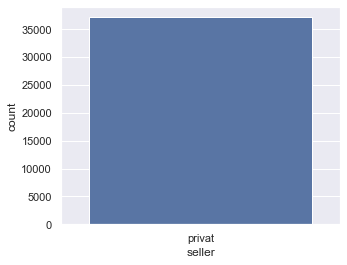

In [257]:
g=sns.countplot(x='seller', data=df, order=df['seller'].value_counts().index)
g.figure.set_size_inches(5, 4)
pass

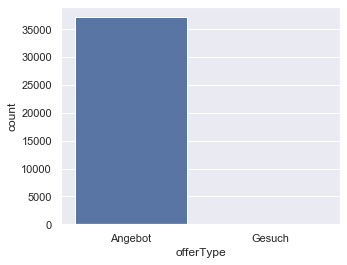

In [258]:
g=sns.countplot(x='offerType', data=df, order=df['offerType'].value_counts().index)
g.figure.set_size_inches(5, 4)
pass

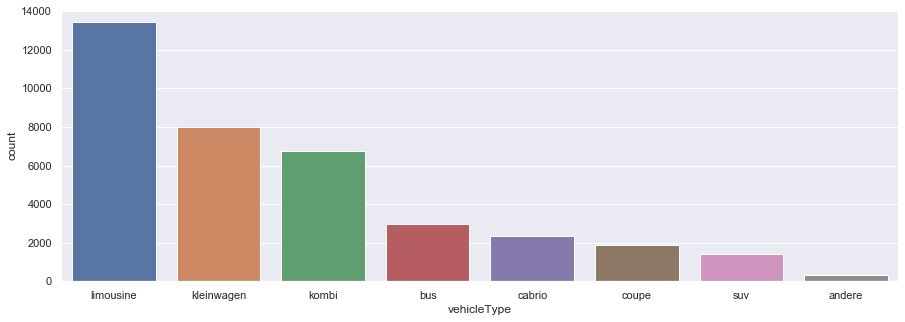

In [262]:
g=sns.countplot(x='vehicleType', data=df, order=df['vehicleType'].value_counts().index)
g.figure.set_size_inches(15, 5)
pass

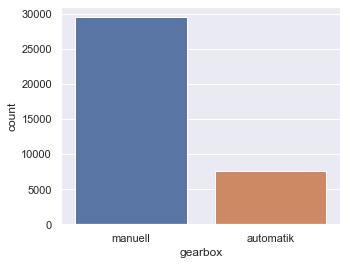

In [263]:
g=sns.countplot(x='gearbox', data=df, order=df['gearbox'].value_counts().index)
g.figure.set_size_inches(5, 4)
pass

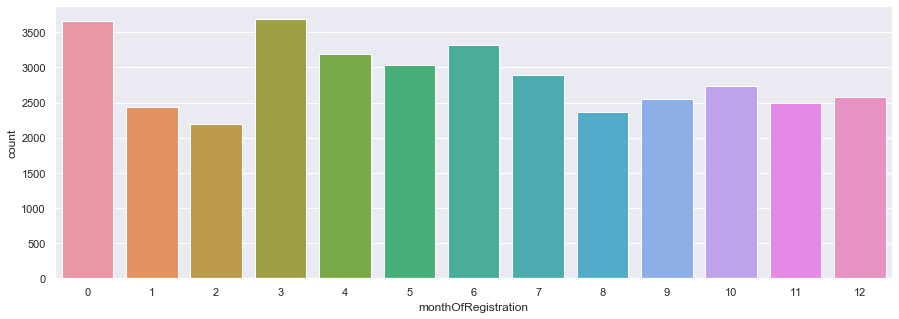

In [264]:
g=sns.countplot(x='monthOfRegistration', data=df)
g.figure.set_size_inches(15, 5)
pass

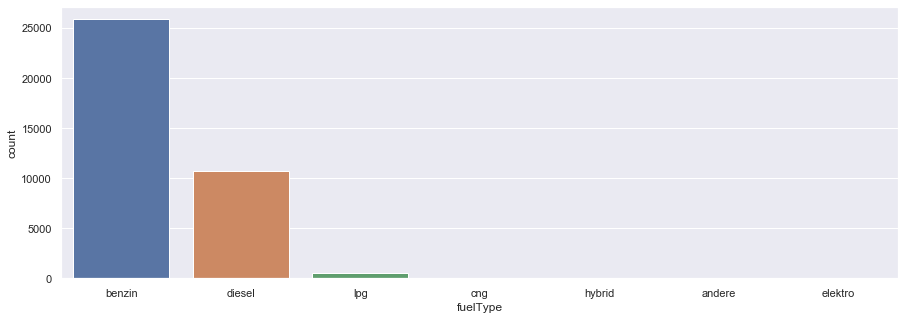

In [265]:
g=sns.countplot(x='fuelType', data=df, order=df['fuelType'].value_counts().index)
g.figure.set_size_inches(15, 5)
pass

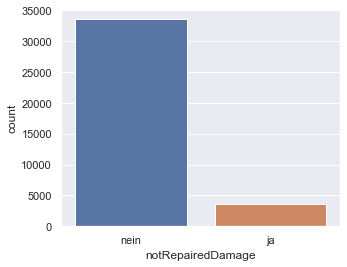

In [266]:
g=sns.countplot(x='notRepairedDamage', data=df, order=df['notRepairedDamage'].value_counts().index)
g.figure.set_size_inches(5, 4)
pass

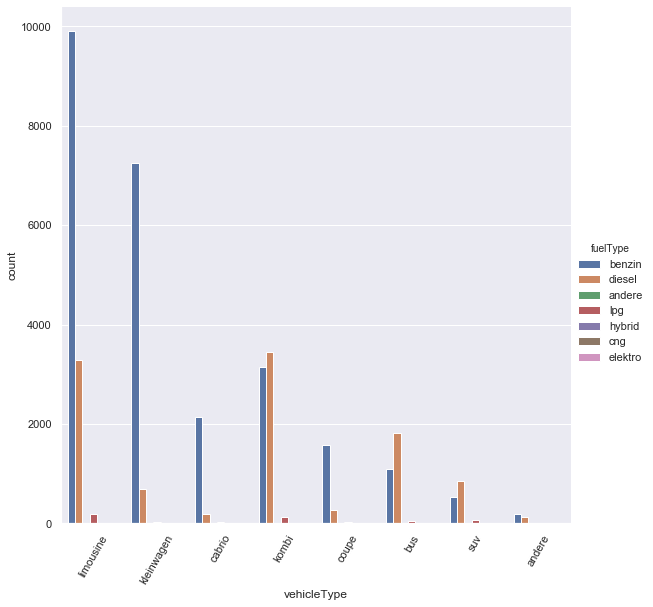

In [268]:
sns.factorplot(x='vehicleType', hue='fuelType', data=df, kind='count', size = 8).set_xticklabels(rotation=60)

### Обработка выбросов

C:\Users\79063\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



<Figure size 1440x1200 with 0 Axes>

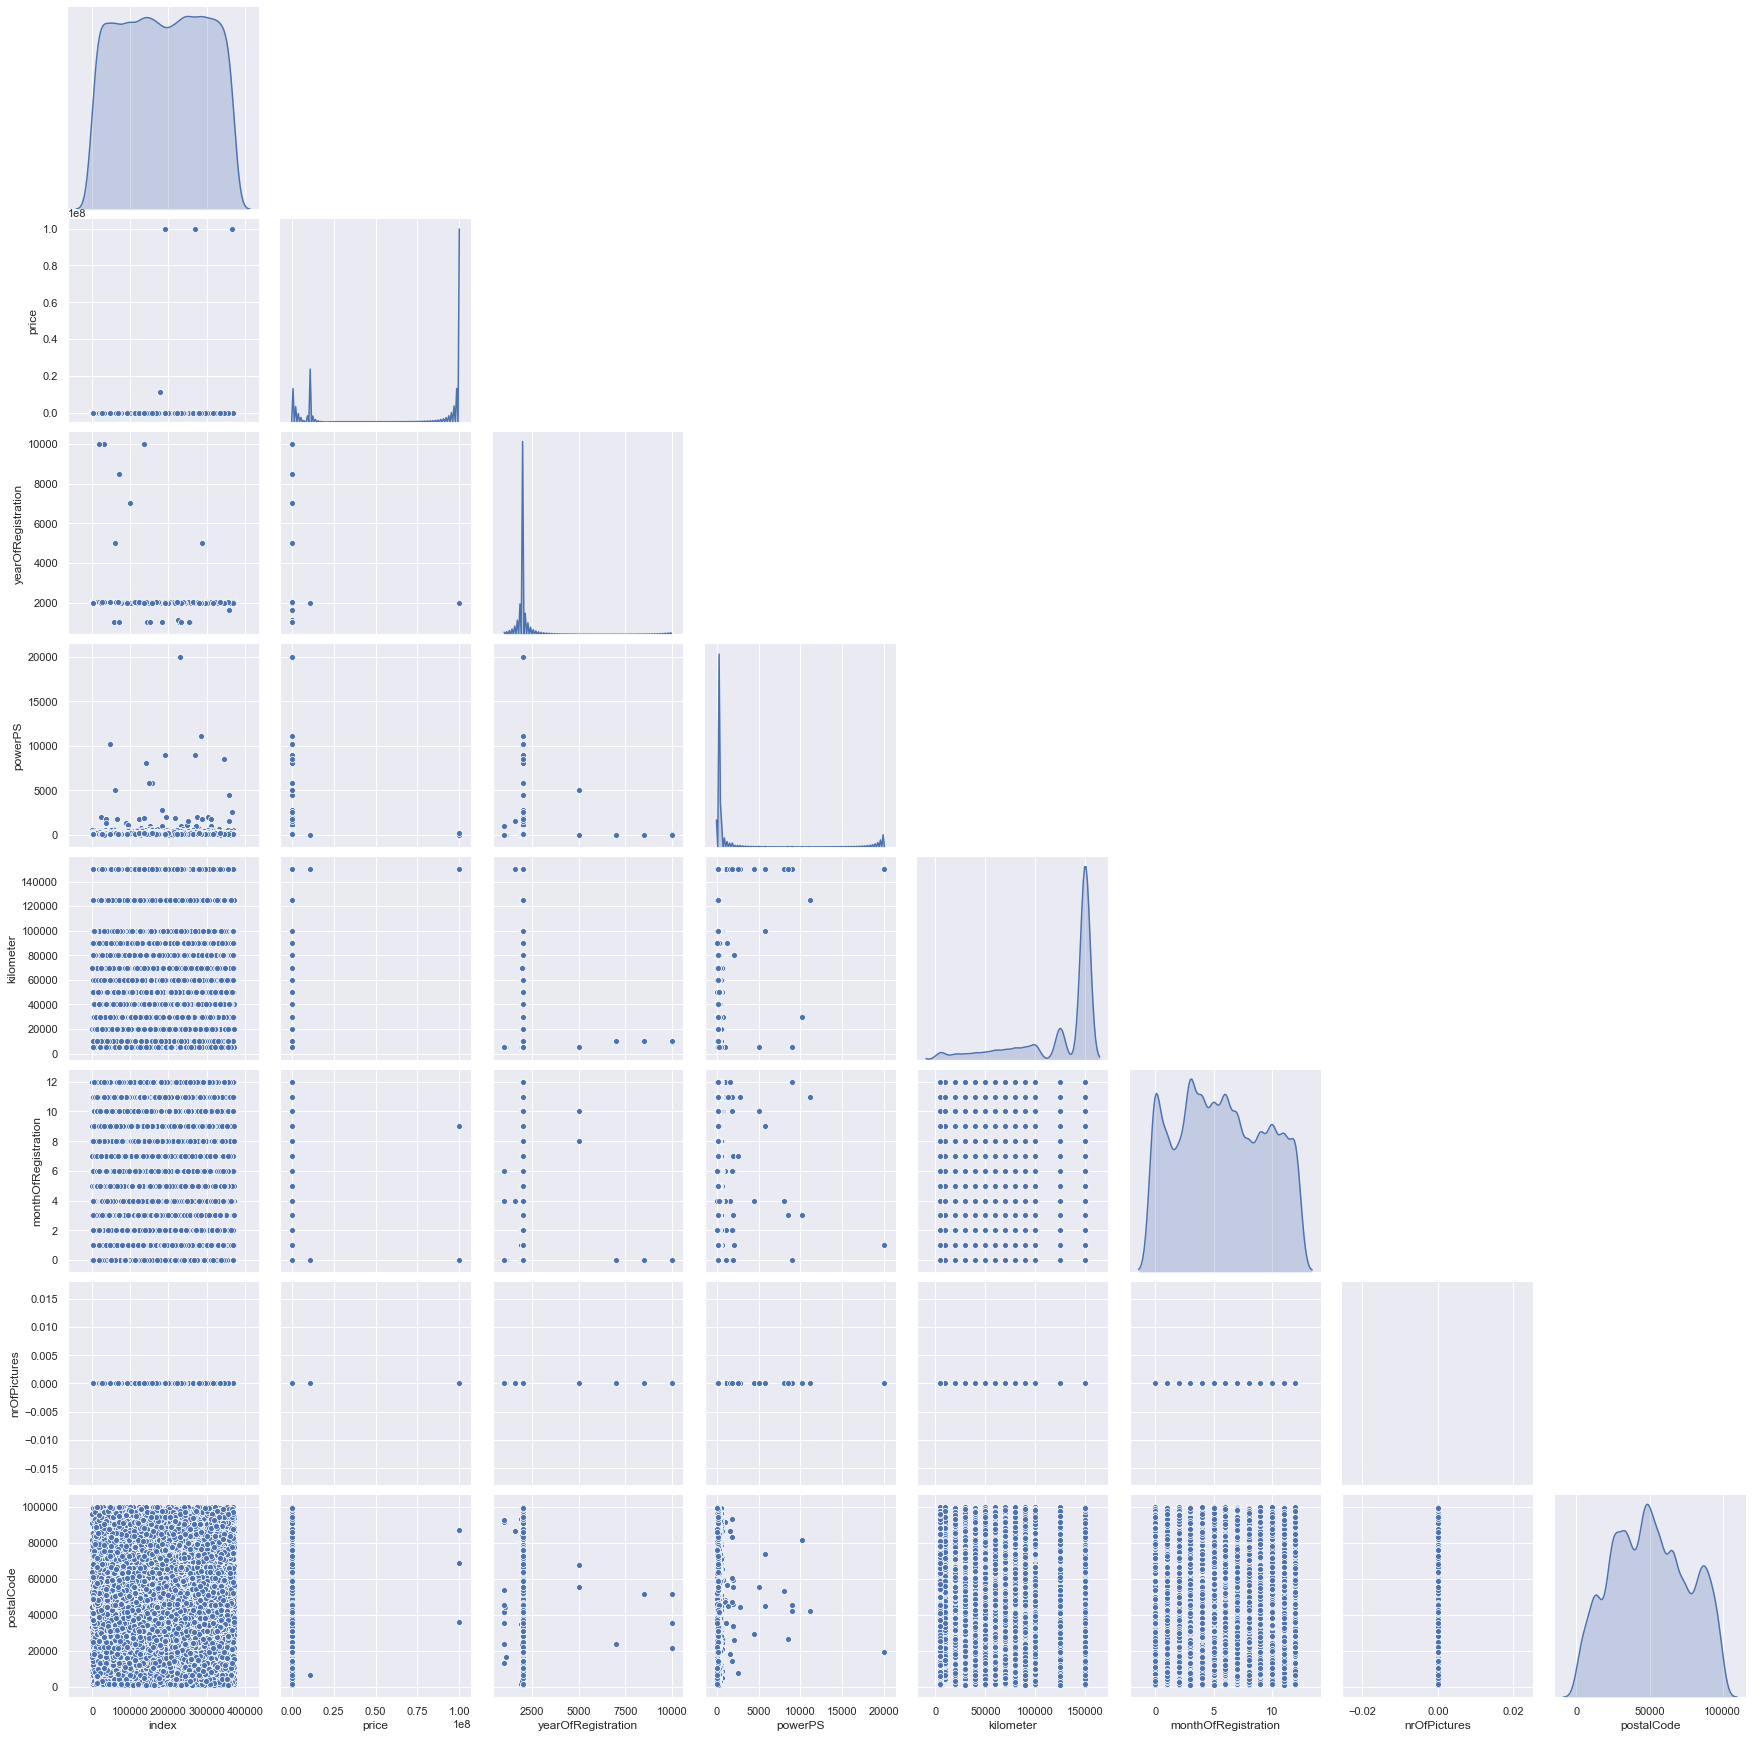

In [191]:
plt.figure(figsize=(18,15), dpi= 80)
sns.pairplot(df, diag_kind="kde", corner=True, height=3)
plt.show()

По графику можно увидеть, что в признаках: price, yearOfRegistration, powerPS, kilometer содержится много выбросов. Удалим выбросы при помощи квантилей и IQR (интерквантильный диапазон)

In [272]:
Q1, Q3 = df['price'].quantile([.1, .9])
IQR = Q3 - Q1
price_low = Q1 - 1.5*IQR
price_up = Q3 + 1.5*IQR

print("price")
print(price_low)
print(price_up)

Q1, Q3 = df['yearOfRegistration'].quantile([.1, .9])
IQR = Q3 - Q1
yearOfRegistration_low = Q1 - 1.5*IQR
yearOfRegistration_up = Q3 + 1.5*IQR

print("year of registration")
print(yearOfRegistration_low)
print(yearOfRegistration_up)

Q1, Q3 = df['powerPS'].quantile([.1, .9])
IQR = Q3 - Q1
powerPS_low = Q1 - 1.5*IQR
powerPS_up = Q3 + 1.5*IQR

print("power PS")
print(powerPS_low)
print(powerPS_up)

Q1, Q3 = df['kilometer'].quantile([.1, .9])
IQR = Q3 - Q1
kilometer_low = Q1 - 1.5*IQR
kilometer_up = Q3 + 1.5*IQR

print("kilometer")
print(kilometer_low)
print(kilometer_up)

price
-19750.0
34250.0
year of registration
1970.5
2038.5
power PS
-289.5
482.5
kilometer
-75000.0
285000.0


In [193]:
outliers_rows = df[
    (df['price'] < price_low) | (df['price'] > price_up) |
    (df['yearOfRegistration'] < yearOfRegistration_low) | (df['yearOfRegistration'] > yearOfRegistration_up) |
    (df['powerPS'] < powerPS_low) | (df['powerPS'] > powerPS_up) |
    (df['kilometer']  < kilometer_low)  | (df['kilometer']  > kilometer_up)].index

clean_df = df.drop(outliers_rows)
clean_df.shape

(36424, 21)

Очистим данные также от признаков, которые по моему представлению не будут влиять на конечную цену или те, в которых всего два значения, одно из которых значительно преобладает по количеству (то например, seller, offerType, nrOfPictures).

In [194]:
clean_df = clean_df.drop(columns=['index', 'dateCrawled', 'seller','offerType', 'abtest', 'lastSeen', 'nrOfPictures', 'dateCreated', 'name', 'postalCode', 'monthOfRegistration'])

Посмотрим, не остались ли еще какие-то явные выбросы в наших данных

In [195]:
#посмотрим на количество машин, у которых 'powerPS'] < 40
clean_df[clean_df['powerPS'] < 40]['yearOfRegistration'].count()

3975

In [197]:
#Удалим значения powerPS меньше 40 и больше 1000
clean_df.drop(clean_df[clean_df['powerPS'] < 40].index, inplace=True)
clean_df.drop(clean_df[clean_df['powerPS'] > 1000].index, inplace=True)

In [198]:
#Посмотрим есть ли значения 'yearOfRegistration' < 1950 после очистки данных при помощи квантилей
clean_df[clean_df['yearOfRegistration'] < 1950]['yearOfRegistration'].count()

0

In [199]:
#Посмотрим есть ли значения 'yearOfRegistration' >= 2016 после очистки данных при помощи квантилей
clean_df[clean_df['yearOfRegistration'] >= 2016]['yearOfRegistration'].count()

1081

In [200]:
#Удалим значения yearOfRegistration позже 2016
clean_df.drop(clean_df[clean_df['yearOfRegistration'] >= 2016].index, inplace=True)

In [201]:
#Посмотрим есть ли значения 'price' > 100000 после очистки данных при помощи квантилей
clean_df[clean_df['price'] > 100000]['price'].count()

0

In [202]:
#Посмотрим есть ли значения 'price' < 100 после очистки данных при помощи квантилей
clean_df[clean_df['price'] < 100]['price'].count()

774

In [203]:
#Удалим значения с ценой ниже 100 и больше 100000
clean_df.drop(clean_df[clean_df['price'] < 100].index, inplace=True)
clean_df.drop(clean_df[clean_df['price'] > 100000].index, inplace=True)

In [204]:
clean_df.shape

(30594, 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E67932AC8>,
      dtype=object)

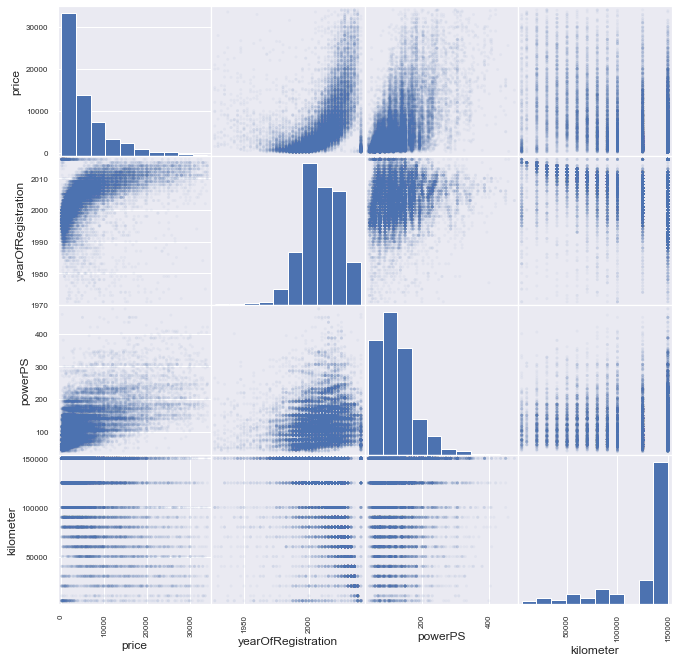

In [205]:
pd.plotting.scatter_matrix(clean_df, figsize = (11, 11), alpha=0.05)

Теперь распределение значений выглядит лучше, без видимых выбросов. На графике уже видна некоторая зависимость признаков с целевой переменной, посмотрим отдельно на зависимость каждой пары.

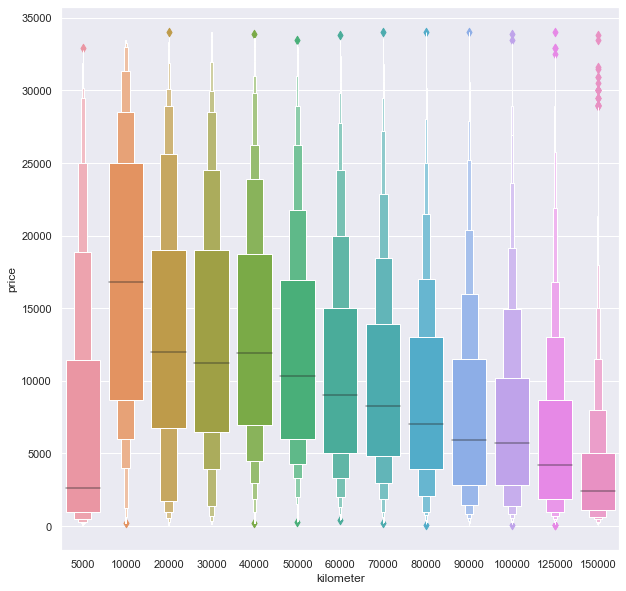

In [215]:
g=sns.boxenplot(data=clean_df, x="kilometer", y="price")
g.figure.set_size_inches(10, 10)

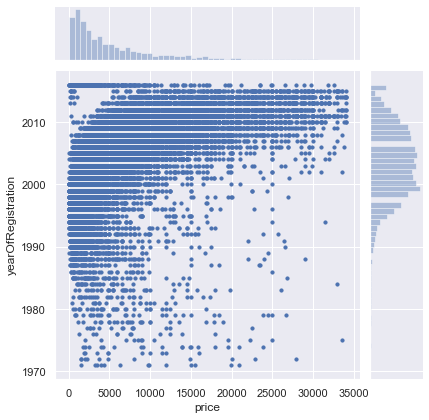

In [207]:
g=sns.jointplot(data=clean_df, x="price", y="yearOfRegistration", alpha=1, s=10)

Видно, что пробег и год регистрации автомобиля влияет на стоимость (чем больше пробег, тем больше цена).

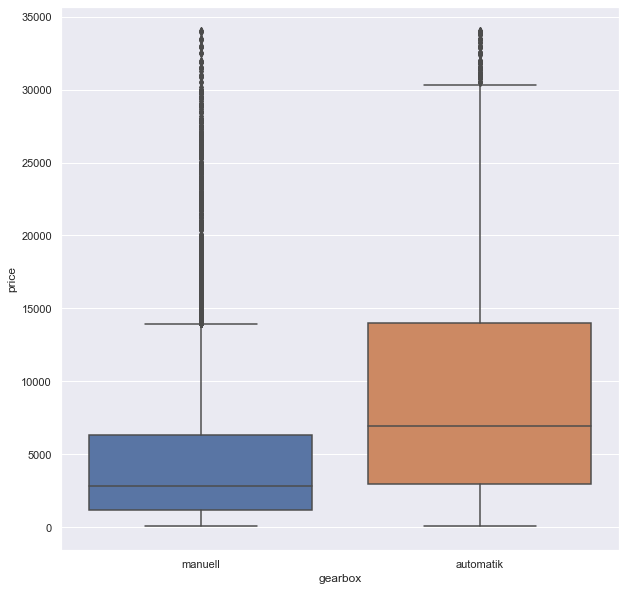

In [217]:
g=sns.boxplot(data=clean_df, x="gearbox", y="price")
g.figure.set_size_inches(10, 10)

Видно, что цена автомобиля с автоматической коробкой передач выше, чем с механической.

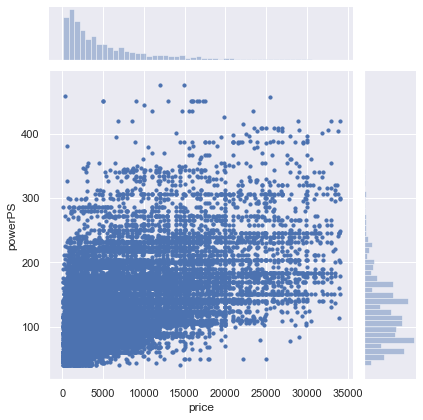

In [209]:
g=sns.jointplot(data=clean_df, x="price", y="powerPS", alpha=1, s=10)

В целом, тенденция такова, что с ростом мощности автомобиля растет и цена. Однако, есть и исключения.

Попробуем посмотреть на зависимость цены от бренда автомобиля, что так же должно взаимосвязано.

In [269]:
group_models_by_price = clean_df["price"].groupby(clean_df["brand"]).agg(["sum", "count", "mean"]).sort_values(by = "mean", ascending=False)
#group_models_by_price

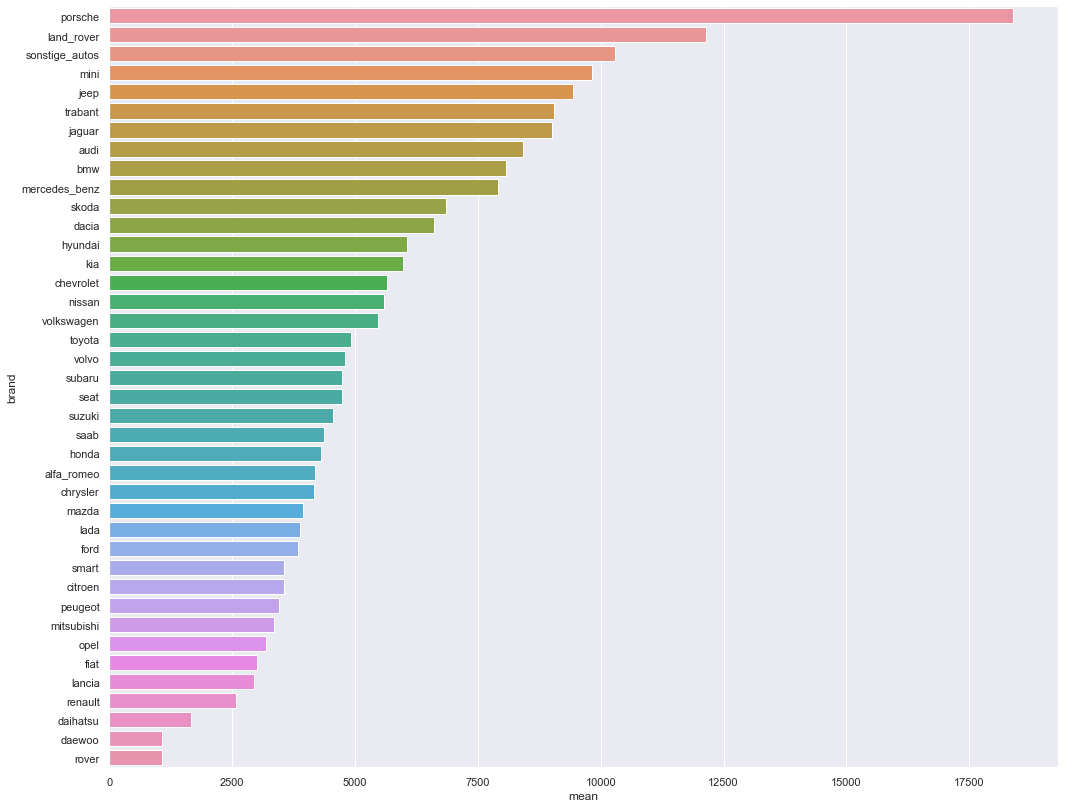

In [270]:
g=sns.barplot(y=group_models_by_price.index, x='mean', data=group_models_by_price)
#sns.set(rc={'figure.figsize':(45, 45)})
g.figure.set_size_inches(17, 14)

По графику видно, что среди брендов в 2016 году дороже всего продавались: porsche, land_rover, mini, sonstige auotos, jeep.

C:\Users\79063\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\79063\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\79063\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_

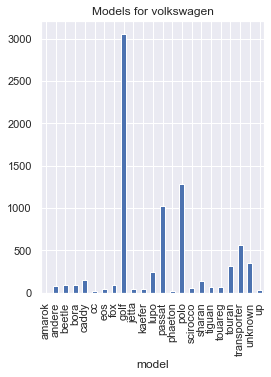

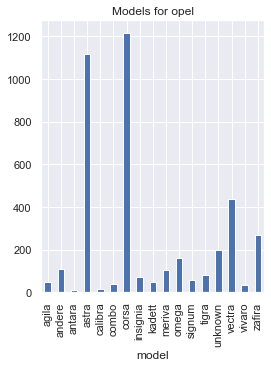

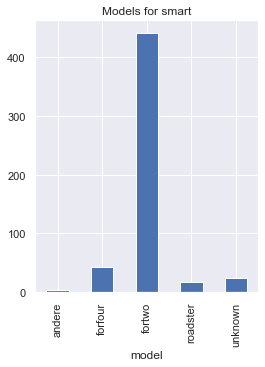

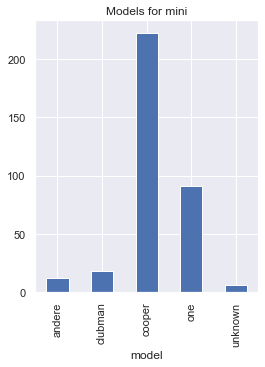

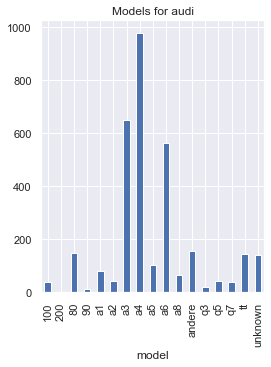

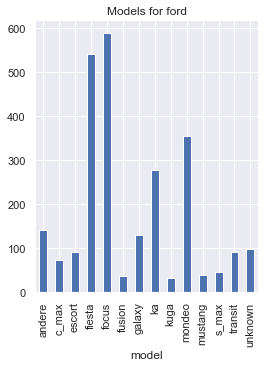

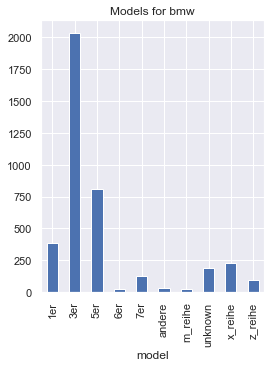

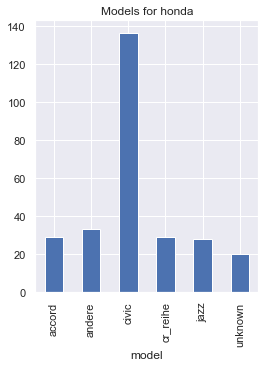

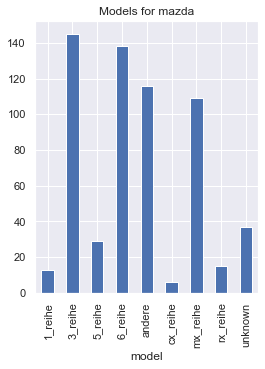

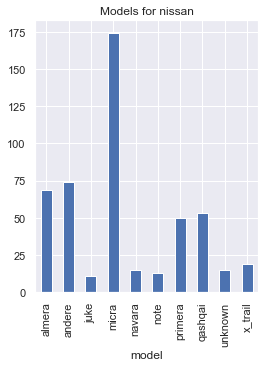

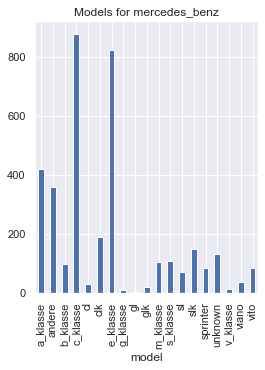

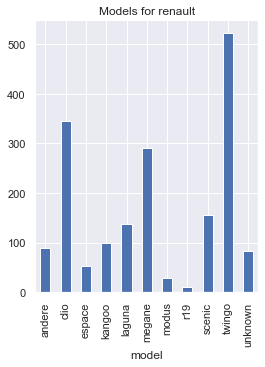

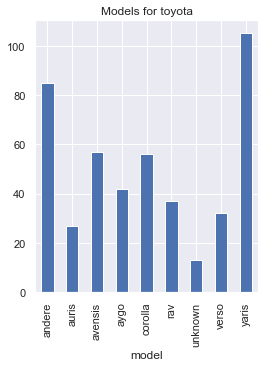

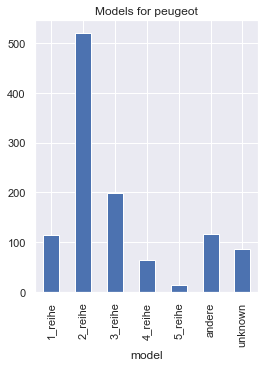

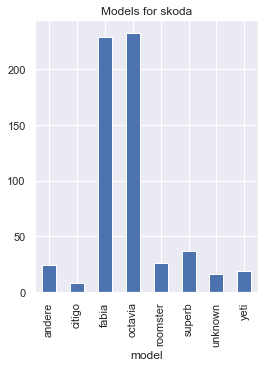

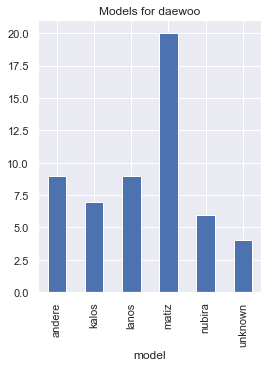

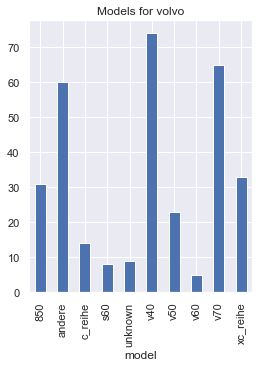

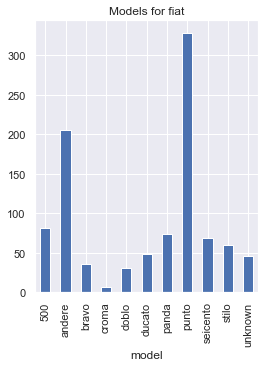

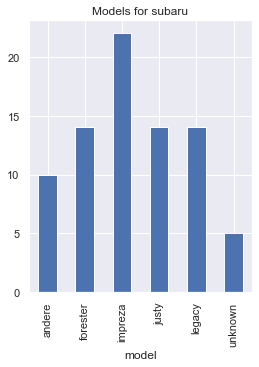

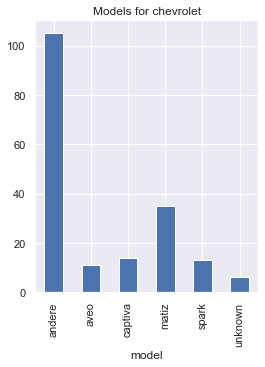

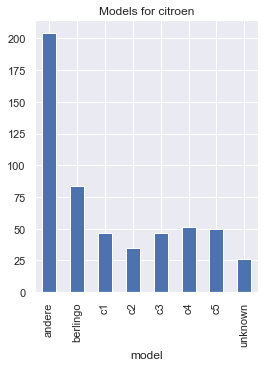

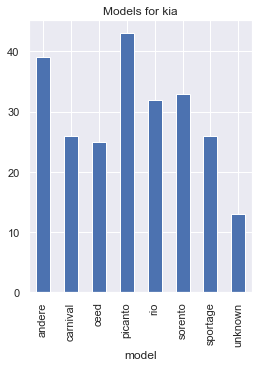

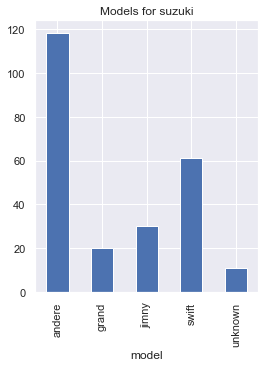

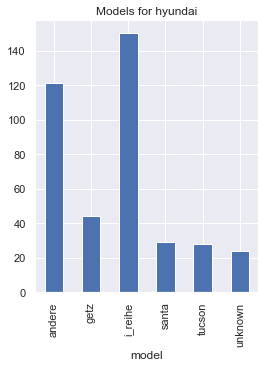

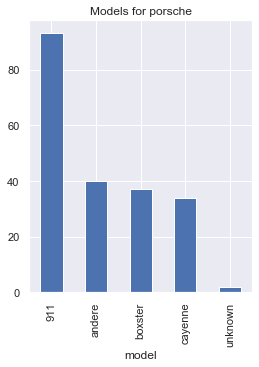

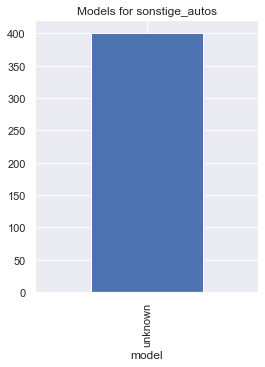

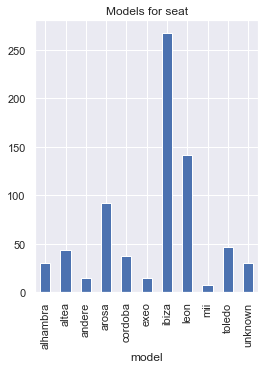

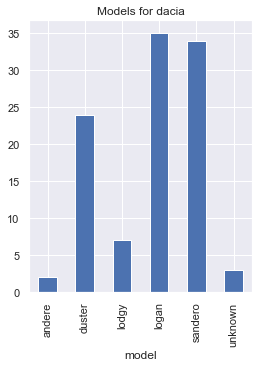

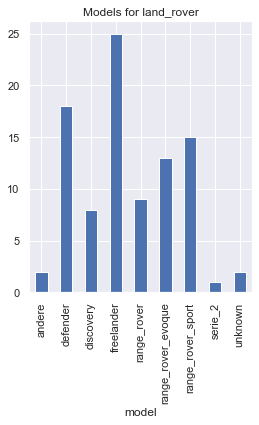

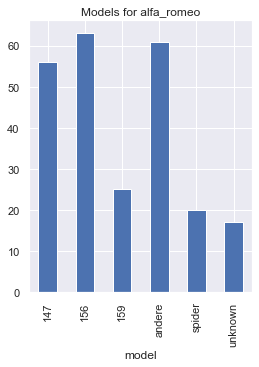

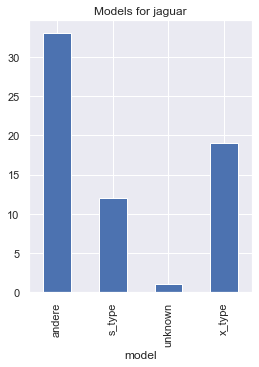

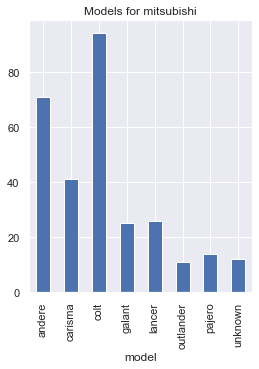

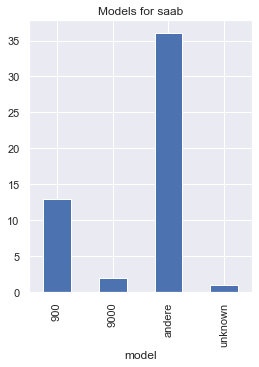

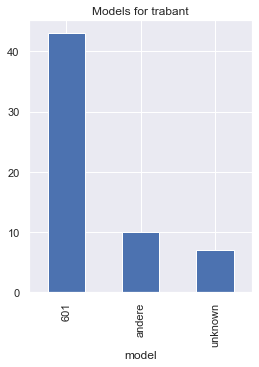

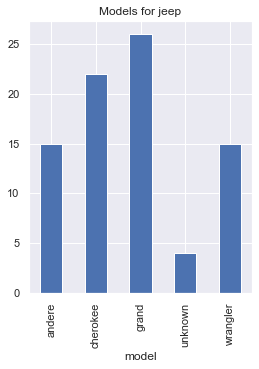

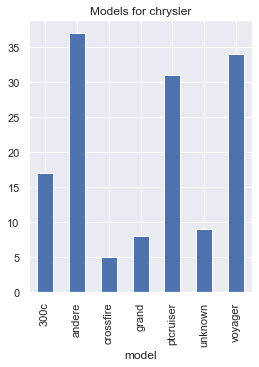

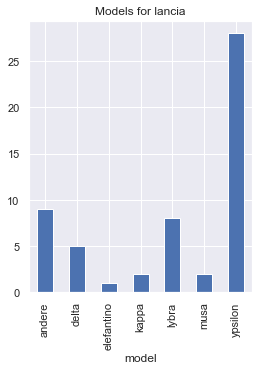

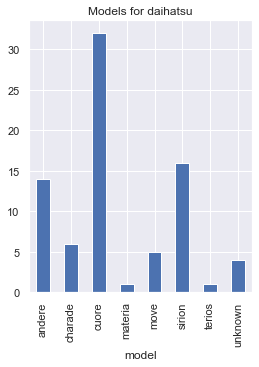

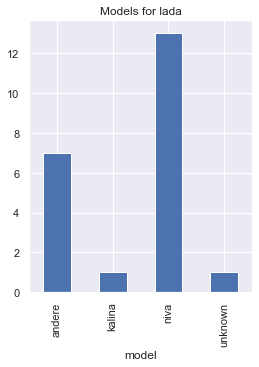

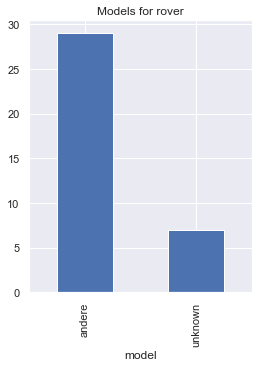

In [271]:
for brand in df['brand'].unique():
    df_brand = df.loc[df.brand == brand]
    #группируем бренды по моделям, учитывая число их появлений
    model_counts = df_brand.groupby('model').size()
    
    #График выведет количество каждой модели по отдельным брендам
    plt.figure(figsize=(4, 5))
    model_counts.plot(kind='bar')
    plt.title(f'Models for {brand}')

C:\Users\79063\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\79063\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\79063\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_

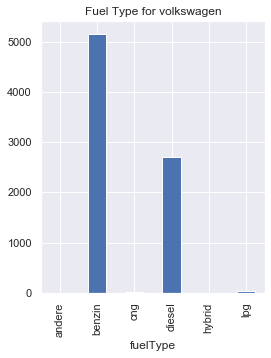

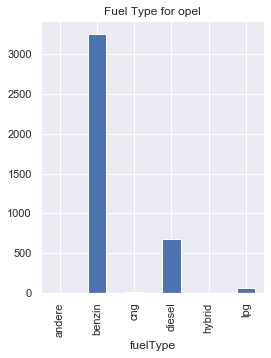

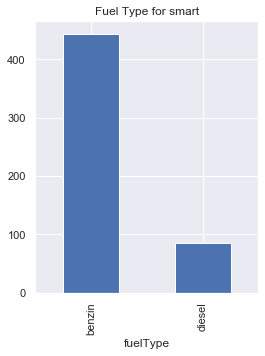

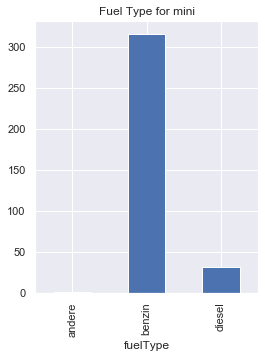

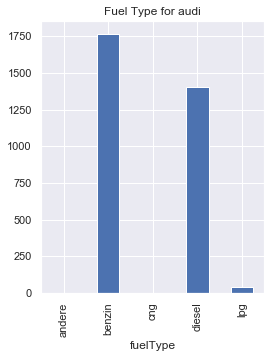

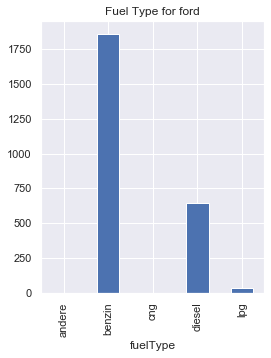

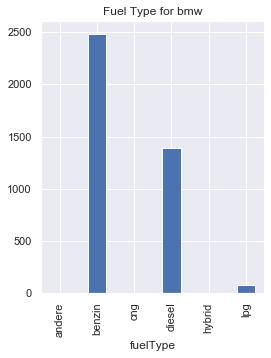

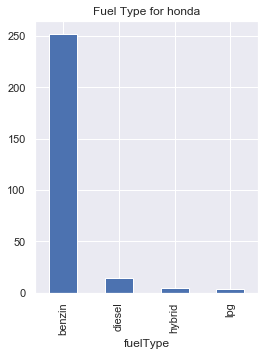

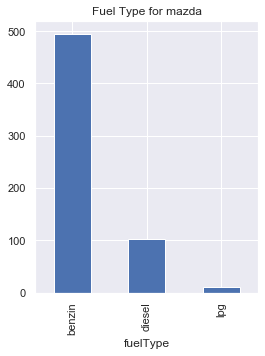

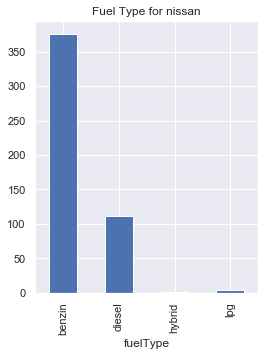

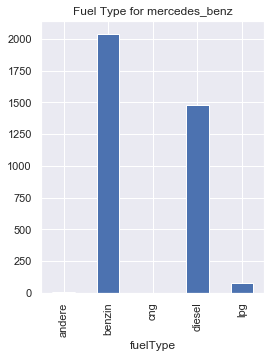

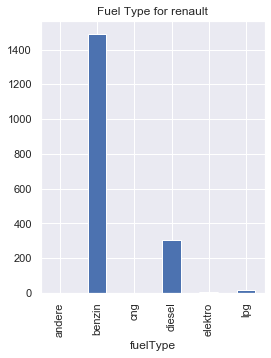

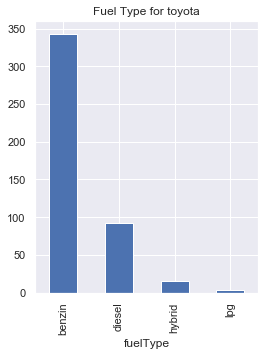

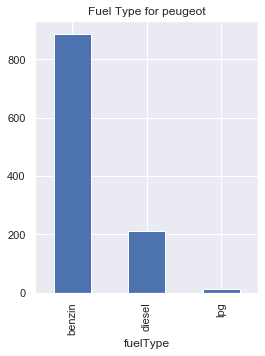

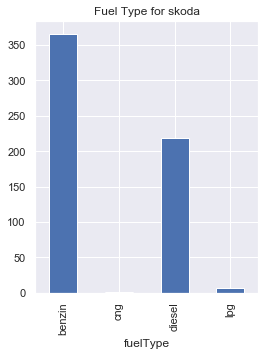

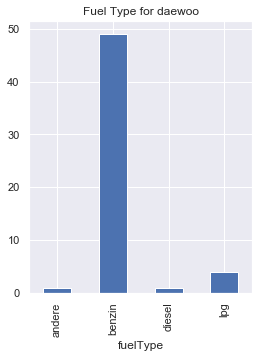

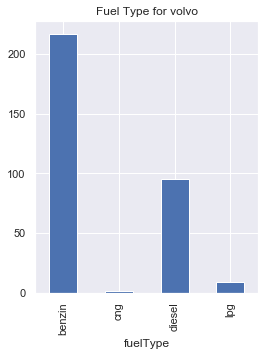

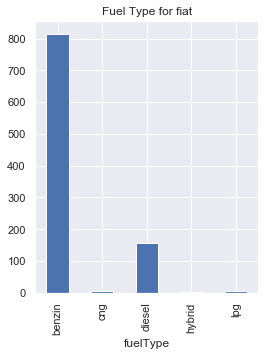

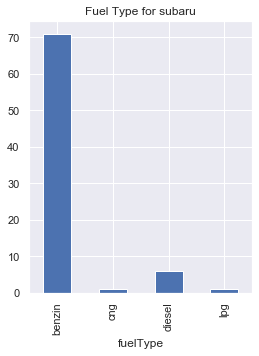

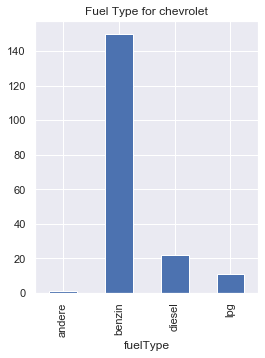

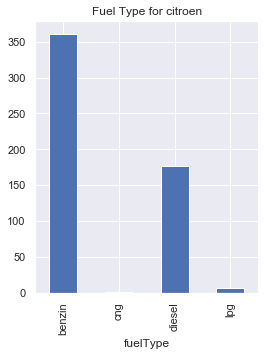

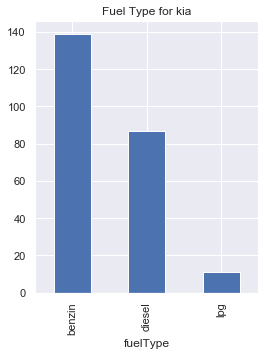

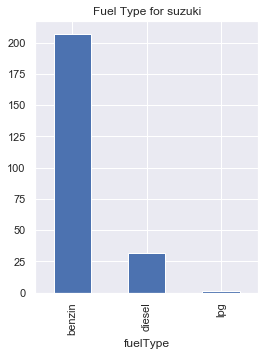

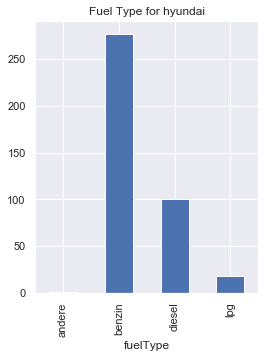

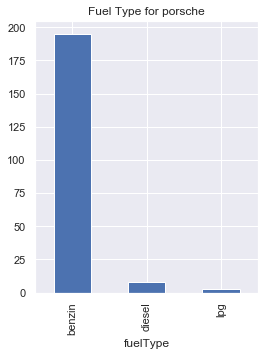

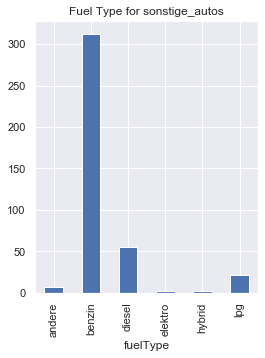

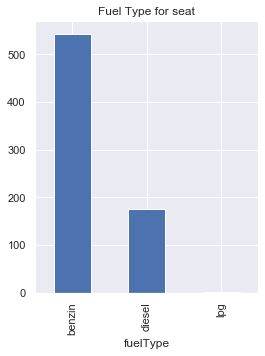

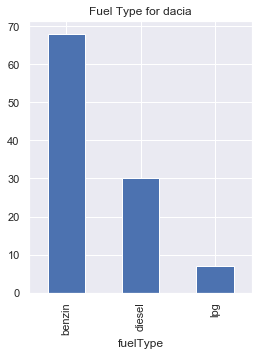

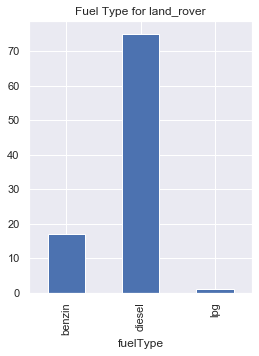

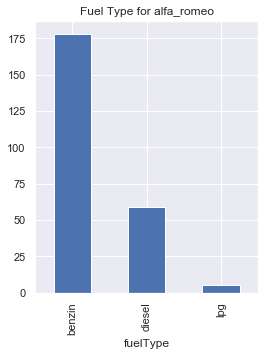

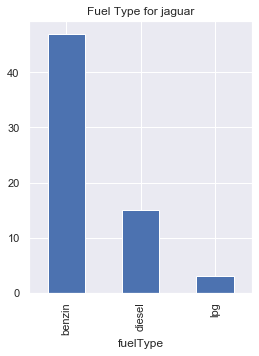

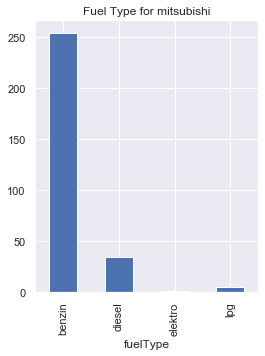

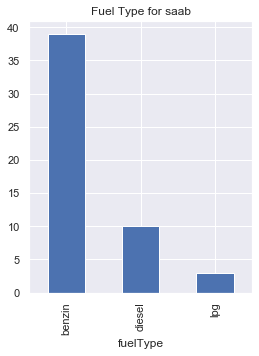

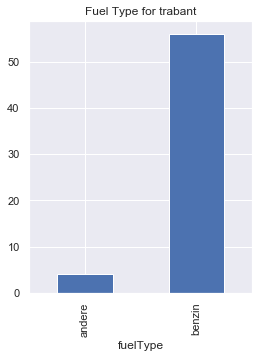

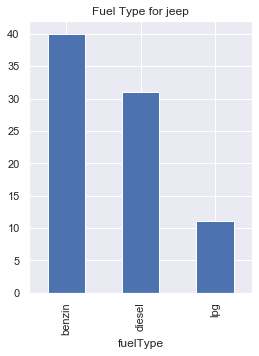

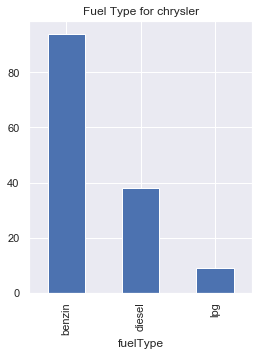

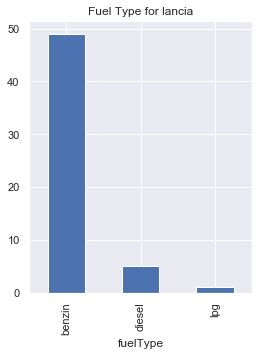

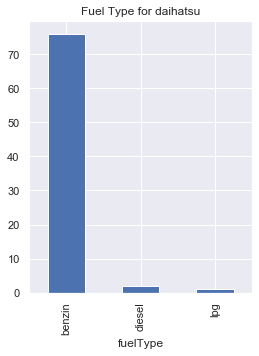

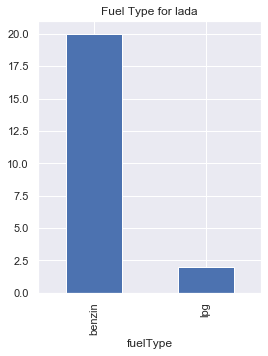

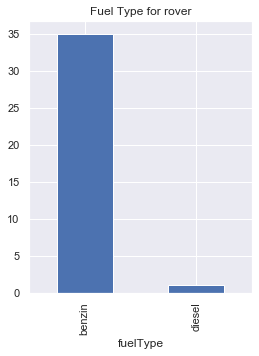

In [219]:
for brand in df['brand'].unique():
    df_brand = df.loc[df.brand == brand]
    
    model_counts = df_brand.groupby('fuelType').size()
    
    #График выведет количество каждого типа топлива по отдельным брендам
    plt.figure(figsize=(4, 5))
    model_counts.plot(kind='bar')
    plt.title(f'Fuel Type for {brand}')

Почти у всех типов автомобилей преобладает бензиновый или  дизельный тип двигателя

C:\Users\79063\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\79063\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\79063\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_

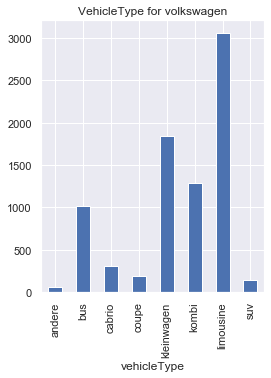

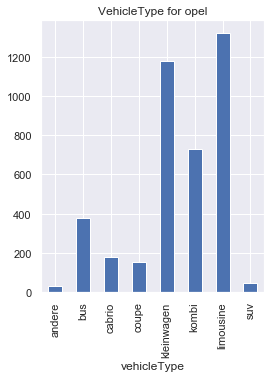

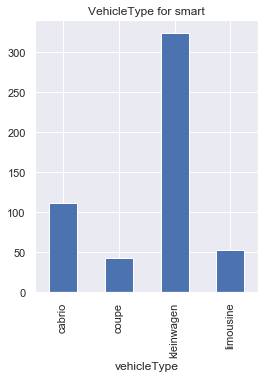

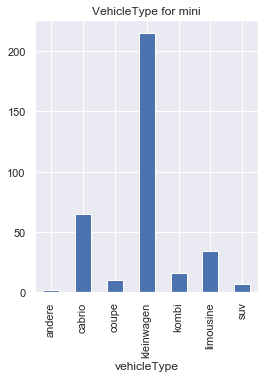

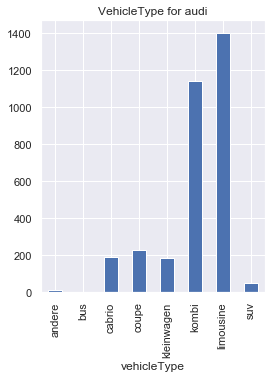

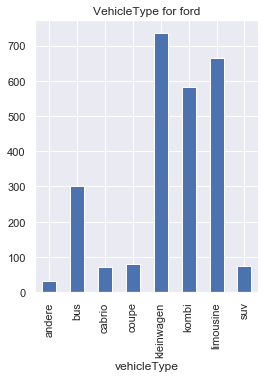

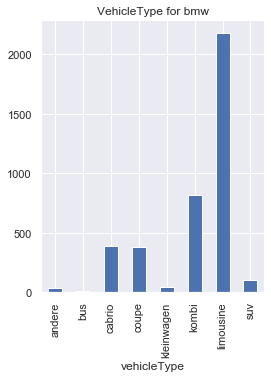

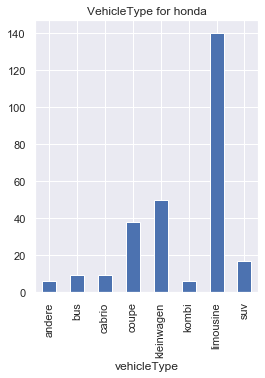

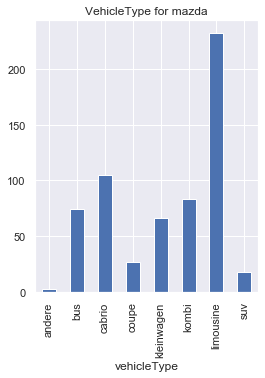

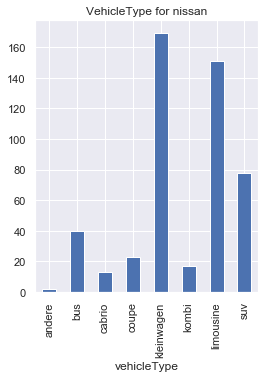

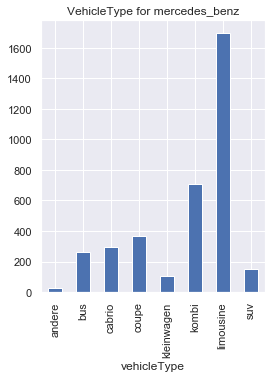

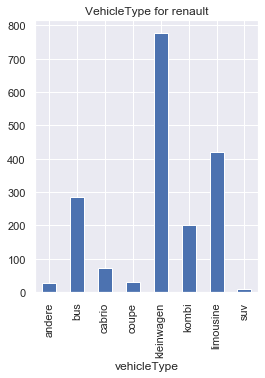

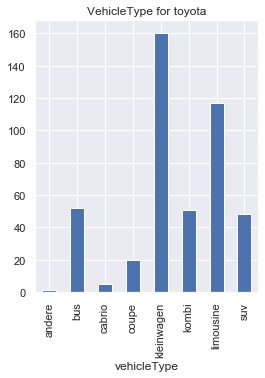

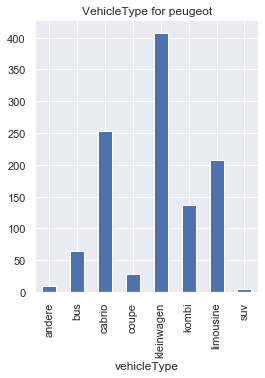

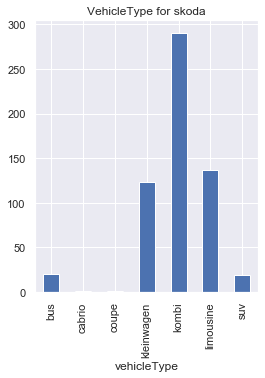

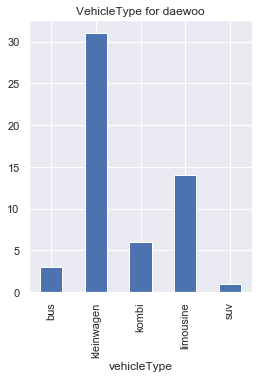

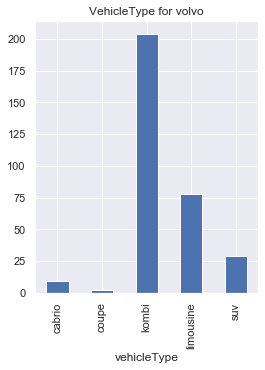

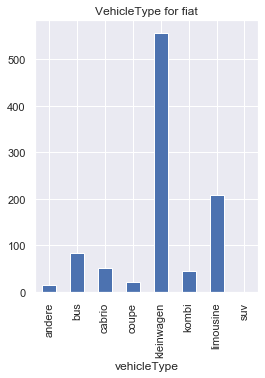

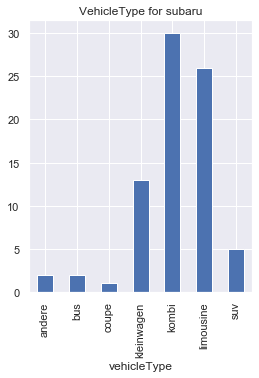

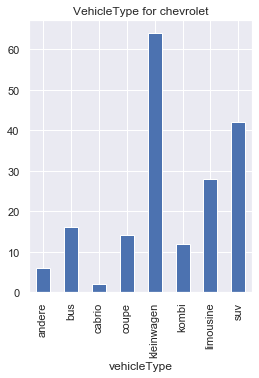

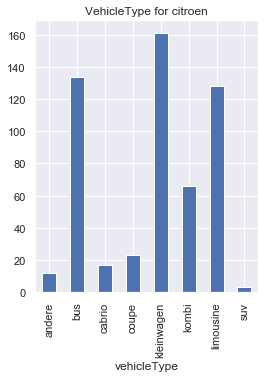

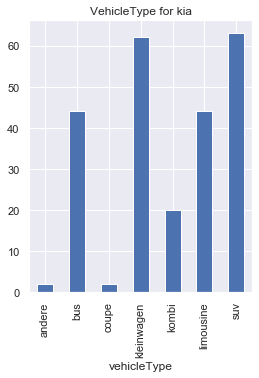

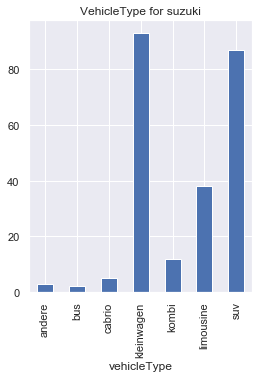

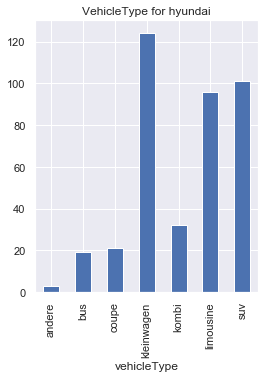

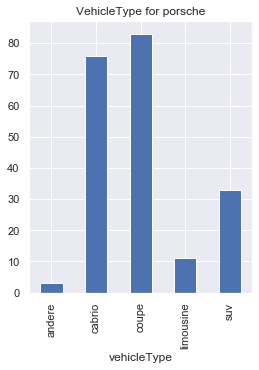

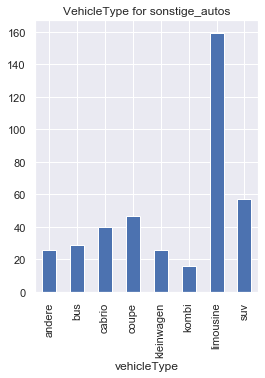

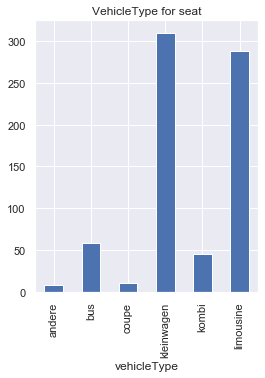

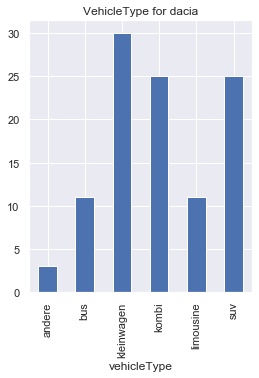

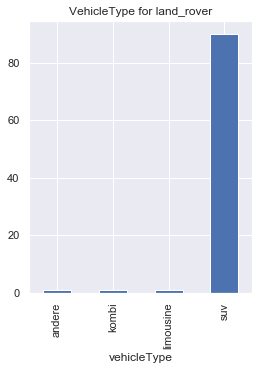

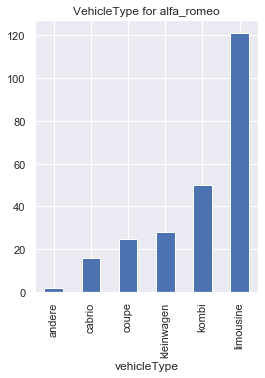

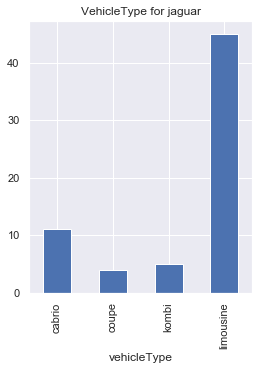

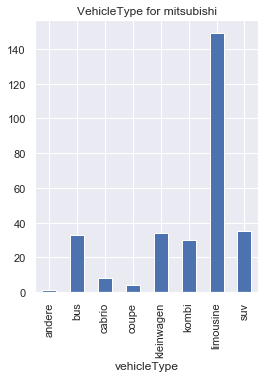

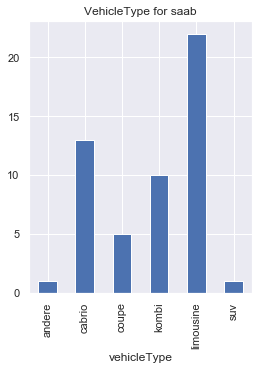

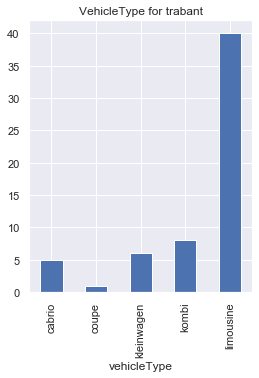

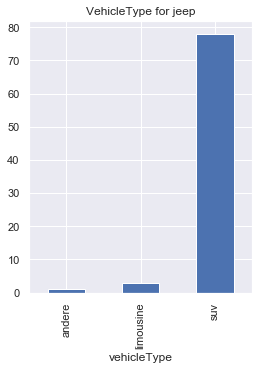

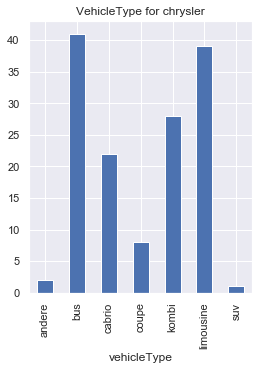

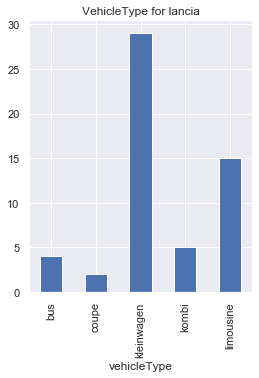

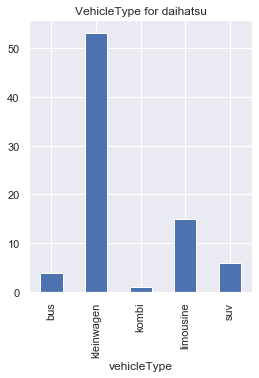

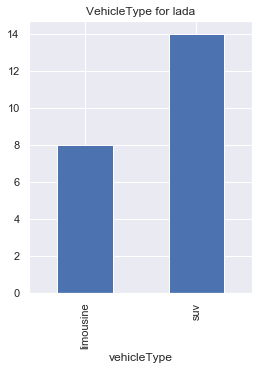

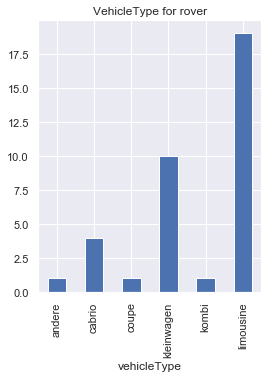

In [221]:
for brand in df['brand'].unique():
    df_brand = df.loc[df.brand == brand]
    
    model_counts = df_brand.groupby('vehicleType').size()
    
    #График выведет количество каждого типа авто по отдельным брендам
    plt.figure(figsize=(4, 5))
    model_counts.plot(kind='bar')
    plt.title(f'VehicleType for {brand}')

У большинства преобладают такие типы автомобилей, как limousin, kleinwagen (малолитражный автомобиль с немецкого) или kombi (универсал). Исключение составляют: porche - (coupe - купе, cabrio - кабриолет, suv); land rover, jeep и lada - (suv - внедорожник).

Далее необходимо категориальные признаки перевести в числовые и рассмотреть heatmap матрицы корреляции признаков уже очищенных от выбросов данных.

notRepairedDamage_mapping 
 {'ja': 0, 'nein': 1} 
 vehicleType_mapping 
 {'andere': 0, 'bus': 1, 'cabrio': 2, 'coupe': 3, 'kleinwagen': 4, 'kombi': 5, 'limousine': 6, 'suv': 7} 
 gearbox_mapping 
 {'automatik': 0, 'manuell': 1} 
 model_mapping 
 {'100': 0, '147': 1, '156': 2, '159': 3, '1_reihe': 4, '1er': 5, '200': 6, '2_reihe': 7, '300c': 8, '3_reihe': 9, '3er': 10, '4_reihe': 11, '500': 12, '5_reihe': 13, '5er': 14, '6_reihe': 15, '6er': 16, '7er': 17, '80': 18, '850': 19, '90': 20, '900': 21, '9000': 22, '911': 23, 'a1': 24, 'a2': 25, 'a3': 26, 'a4': 27, 'a5': 28, 'a6': 29, 'a8': 30, 'a_klasse': 31, 'accord': 32, 'agila': 33, 'alhambra': 34, 'almera': 35, 'altea': 36, 'amarok': 37, 'andere': 38, 'antara': 39, 'arosa': 40, 'astra': 41, 'auris': 42, 'avensis': 43, 'aveo': 44, 'aygo': 45, 'b_klasse': 46, 'beetle': 47, 'berlingo': 48, 'bora': 49, 'boxster': 50, 'bravo': 51, 'c1': 52, 'c2': 53, 'c3': 54, 'c4': 55, 'c5': 56, 'c_klasse': 57, 'c_max': 58, 'c_reihe': 59, 'caddy': 60, 'calib

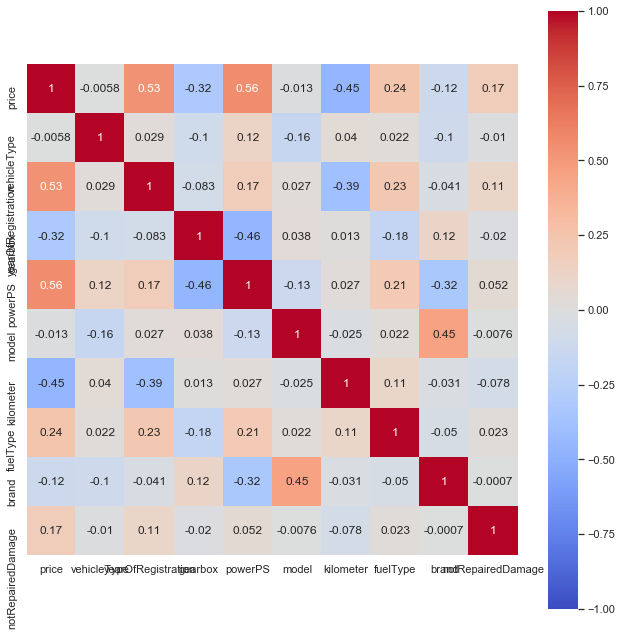

In [53]:
categorical_columns =   ["notRepairedDamage",
                        "vehicleType",
                        "gearbox",
                        "model",
                        "fuelType",
                        "brand"]

encoder = LabelEncoder()
encoded_df = clean_df.copy()

encoded_df['notRepairedDamage'] = encoder.fit_transform(encoded_df['notRepairedDamage'])
notRepairedDamage_mapping = {l: i for i, l in enumerate(encoder.classes_)}
encoded_df['vehicleType'] = encoder.fit_transform(encoded_df['vehicleType'])
vehicleType_mapping = {l: i for i, l in enumerate(encoder.classes_)}
encoded_df['gearbox'] = encoder.fit_transform(encoded_df['gearbox'])
gearbox_mapping = {l: i for i, l in enumerate(encoder.classes_)}
encoded_df['model'] = encoder.fit_transform(encoded_df['model'])
model_mapping = {l: i for i, l in enumerate(encoder.classes_)}
encoded_df['fuelType'] = encoder.fit_transform(encoded_df['fuelType'])
fuelType_mapping = {l: i for i, l in enumerate(encoder.classes_)}
encoded_df['brand'] = encoder.fit_transform(encoded_df['brand'])
brand_mapping = {l: i for i, l in enumerate(encoder.classes_)}

print('notRepairedDamage_mapping \n', notRepairedDamage_mapping, '\n','vehicleType_mapping \n', vehicleType_mapping, '\n','gearbox_mapping \n', gearbox_mapping, '\n','model_mapping \n', model_mapping, '\n','fuelType_mapping \n', fuelType_mapping, '\n','brand_mapping \n', brand_mapping)


corr = encoded_df.corr()
g=sns.heatmap(corr, square=True, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
g.figure.set_size_inches(11,11)

Видим, что сильной корреляции между признакми нет.

In [54]:
encoded_df

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,700,6,1997,1,75,113,90000,1,38,1
1,10990,6,2008,0,260,118,125000,1,24,1
2,7350,4,2011,1,71,103,30000,1,32,1
3,8800,2,2008,1,90,159,125000,1,21,1
4,5500,5,2004,0,131,27,150000,3,1,1
...,...,...,...,...,...,...,...,...,...,...
37147,16000,6,2013,1,140,135,60000,1,30,1
37148,10999,6,2007,1,170,57,150000,3,20,1
37149,3250,5,2007,1,131,148,150000,3,10,1
37151,900,2,1995,1,90,174,150000,1,27,1


In [56]:
from sklearn.metrics import classification_report,confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [57]:
(X_train, X_test, y_train, y_test) = train_test_split(encoded_df.drop('price', axis=1),
                                            encoded_df['price'],
                                            test_size=0.3, 
                                            random_state=5)

In [58]:
#масштабирование производим отдельно на train и test, для честных итоговых результатов
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [59]:
def calc_metrics(true, pred):
    mse = metrics.mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(true, pred)
    medae = metrics.median_absolute_error(true, pred)
    R2 = metrics.r2_score(true, pred)

    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

### LinearRegression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_train_predict = lin_reg_model.predict(X_train)
print("Train score: ")
print(calc_metrics(y_train, y_train_predict))

Train score: 
MSE:   13295133.094532764
RMSE:  3646.249181629358
R2:    0.6389855410566627
MAE:   2535.6854446370244
MedAE: 1784.5781725898223
None


In [63]:
y_test_predict = lin_reg_model.predict(X_test)
print("Test score: ")
print(calc_metrics(y_test, y_test_predict))

Test score: 
MSE:   13365247.037394
RMSE:  3655.8510688202277
R2:    0.6322752559851221
MAE:   2528.2313089352206
MedAE: 1774.8226846487505
None


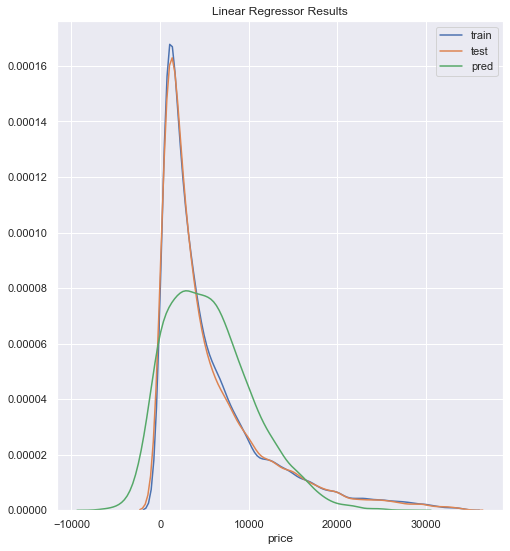

In [64]:
sns.set(rc={'figure.figsize':(8, 9)})
sns.distplot(y_train, bins=100, hist=False, label='train').set_title("Linear Regressor Results")
sns.distplot(y_test, bins=100, hist=False, label='test')
sns.distplot(y_test_predict, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Модель показала плохие результаты и на тренировочном, и на тестовом наборе данных. Вряд ли это переобучение, но все-таки посмотрим на коэффициенты линейной регрессии.

In [65]:
coefs = pd.Series(lin_reg_model.coef_, 
                  index=X_train.columns)

x = abs(coefs).sort_values(ascending=False)
coefs[x.index]

powerPS               2939.261382
kilometer            -2188.925508
yearOfRegistration    1684.697550
fuelType               667.171933
notRepairedDamage      501.788390
vehicleType           -349.232837
gearbox               -341.003071
brand                  214.459952
model                   45.983127
dtype: float64

Коэффициенты достаточно логичные: чем больше мощность и год регистрации - тем выше цена, чем больше пробег - тем меньше цена.

### Регуляризация при помощи Гребневой регрессии

In [66]:
from sklearn import linear_model
ridgeModel = linear_model.RidgeCV(alphas=np.arange(0, 100, 0.1), 
                                  cv=5,
                                  scoring='neg_mean_squared_error')
ridgeModel.fit(X_train, y_train)

RidgeCV(alphas=array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8...
       94.6, 94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6,
       95.7, 95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7,
       96.8, 96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8,
       97.9, 98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9,
       99. , 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize

In [67]:
y_test_predict = ridgeModel.predict(X_test)

In [68]:
calc_metrics(y_test, y_test_predict)

MSE:   13365031.778257273
RMSE:  3655.8216283425636
R2:    0.6322811785176969
MAE:   2528.0513161543945
MedAE: 1775.6697608655413


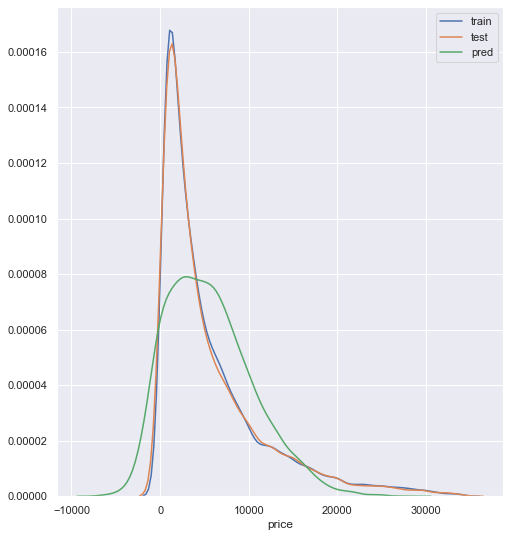

In [69]:
sns.distplot(y_train, bins=100, hist=False, label='train')
sns.distplot(y_test, bins=100, hist=False, label='test')
sns.distplot(y_test_predict, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

### CV ГРЕБНЕВОЙ РЕГРЕССИИ

In [70]:
ridgeModel = linear_model.RidgeCV(alphas=np.arange(0, 100, 0.1), 
                                  cv=10,
                                  scoring='neg_mean_squared_error')

In [71]:
%%time

ridgeModel.fit(X_train, y_train)

Wall time: 1min 54s


RidgeCV(alphas=array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8...
       94.6, 94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6,
       95.7, 95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7,
       96.8, 96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8,
       97.9, 98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9,
       99. , 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9]),
        cv=10, fit_intercept=True, gcv_mode=None, normaliz

In [72]:
ridgeModel.alpha_

20.1

In [73]:
y_test_predict = ridgeModel.predict(X_test)

In [74]:
calc_metrics(y_test, y_test_predict)

MSE:   13364746.852432353
RMSE:  3655.782659353856
R2:    0.6322890178247998
MAE:   2527.8064119039
MedAE: 1775.1629739051227


In [75]:
coefs = pd.Series(ridgeModel.coef_, 
                  index=X_train.columns)

x = abs(coefs).sort_values(ascending=False)
coefs[x.index]

powerPS               2935.564817
kilometer            -2186.881375
yearOfRegistration    1684.481159
fuelType               666.856753
notRepairedDamage      501.685213
vehicleType           -348.768426
gearbox               -342.241389
brand                  213.179875
model                   46.228455
dtype: float64

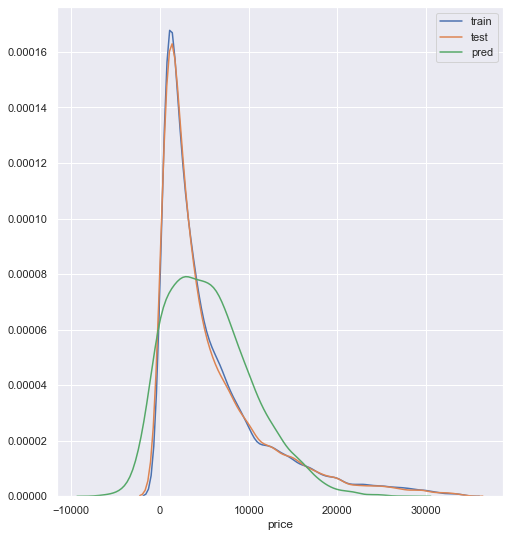

In [76]:
sns.distplot(y_train, bins=100, hist=False, label='train')
sns.distplot(y_test, bins=100, hist=False, label='test')
sns.distplot(y_test_predict, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Видно, что регуляризация не помогла и результаты предсказаний всё так же оставляют желать лучшего.

### KNeighborsRegressor

In [78]:
from sklearn.neighbors import KNeighborsRegressor

In [79]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [80]:
y_train_predict = knn_model.predict(X_train)
print("Train score: ")
print(calc_metrics(y_train, y_train_predict))

Train score: 
MSE:   4348226.815897268
RMSE:  2085.2402297810363
R2:    0.8819287674562968
MAE:   1212.7932850805507
MedAE: 634.0
None


In [81]:
y_test_predict = knn_model.predict(X_test)
print("Test score: ")
print(calc_metrics(y_test, y_test_predict))

Test score: 
MSE:   6552752.372589606
RMSE:  2559.834442418026
R2:    0.8197108379619424
MAE:   1480.7902821658133
MedAE: 760.2000000000007
None


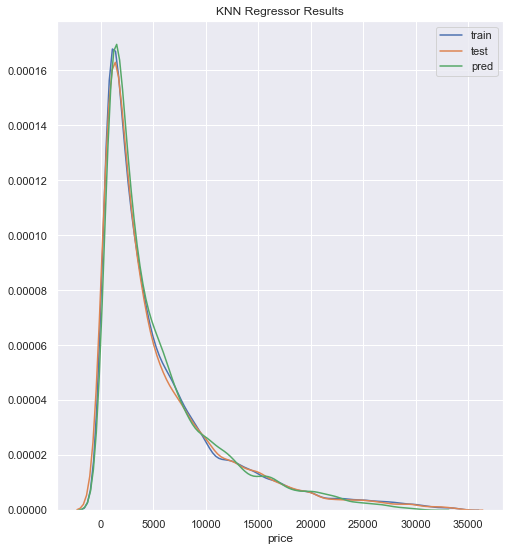

In [82]:
sns.set(rc={'figure.figsize':(8, 9)})
sns.distplot(y_train, bins=100, hist=False, label='train').set_title("KNN Regressor Results")
sns.distplot(y_test, bins=100, hist=False, label='test')
sns.distplot(y_test_predict, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Метод Ближайшего соседа показал оценку намного лучше, чем линейная регрессия.

### Decision Trees

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import graphviz
from sklearn.tree import export_graphviz

In [84]:
dtree_model = DecisionTreeRegressor(max_depth=7)
dtree_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [85]:
y_train_predict = knn_model.predict(X_train)
print("Train score: ")
print(calc_metrics(y_train, y_train_predict))

Train score: 
MSE:   4348226.815897268
RMSE:  2085.2402297810363
R2:    0.8819287674562968
MAE:   1212.7932850805507
MedAE: 634.0
None


In [86]:
y_test_predict = knn_model.predict(X_test)
print("Test score: ")
print(calc_metrics(y_test, y_test_predict))

Test score: 
MSE:   6552752.372589606
RMSE:  2559.834442418026
R2:    0.8197108379619424
MAE:   1480.7902821658133
MedAE: 760.2000000000007
None


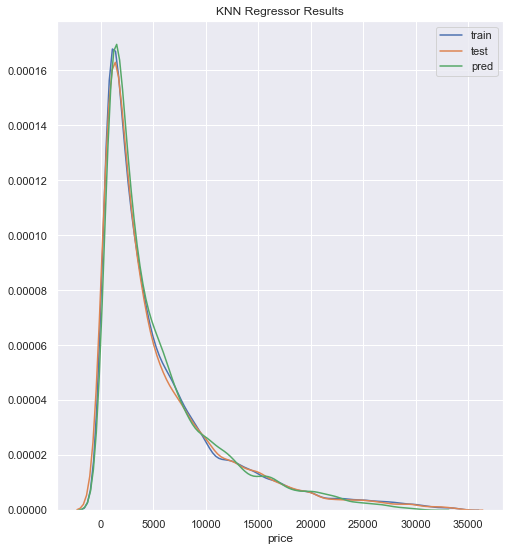

In [87]:
sns.set(rc={'figure.figsize':(8, 9)})
sns.distplot(y_train, bins=100, hist=False, label='train').set_title("KNN Regressor Results")
sns.distplot(y_test, bins=100, hist=False, label='test')
sns.distplot(y_test_predict, bins=100, hist=False, label='pred')
plt.legend()
plt.show()

Decision Trees хорошо сработал на наших данных, возможно ансамбль решающих деревьев еще повысит результаты предсказаний.

### RandomForestRegressor

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rfr_model = RandomForestRegressor(n_estimators=100, max_depth=15, verbose=1)
rfr_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.7s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=1, warm_start=False)

In [90]:
y_train_predict = rfr_model.predict(X_train)
print("Train score: ")
print(calc_metrics(y_train, y_train_predict))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train score: 
MSE:   1248534.7049289534
RMSE:  1117.378496718526
R2:    0.966097437478286
MAE:   745.9229407532166
MedAE: 495.90172309687057
None


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [91]:
y_test_predict = rfr_model.predict(X_test)
print("Test score: ")
print(calc_metrics(y_test, y_test_predict))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test score: 
MSE:   4676220.731563259
RMSE:  2162.4571051383327
R2:    0.8713407940264717
MAE:   1261.4634115210392
MedAE: 690.6500116257503
None


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


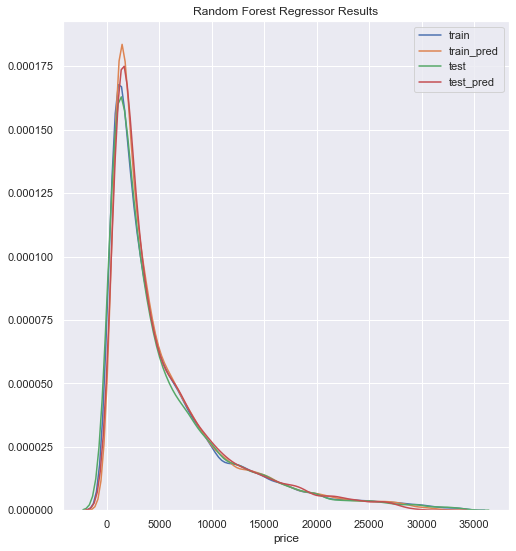

In [92]:
sns.set(rc={'figure.figsize':(8, 9)})
sns.distplot(y_train, bins=100, hist=False, label='train').set_title("Random Forest Regressor Results")
sns.distplot(y_train_predict, bins=100, hist=False, label='train_pred')
sns.distplot(y_test, bins=100, hist=False, label='test')
sns.distplot(y_test_predict, bins=100, hist=False, label='test_pred')
plt.legend()
plt.show()

### RandomForestRegressor Overfitting

Увеличим параметр max_depth для того, чтобы вызвать переобучение.

In [93]:
rfr_overfit_model = RandomForestRegressor(n_estimators=100, max_depth=80,verbose=1)
rfr_overfit_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.2s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=1, warm_start=False)

In [94]:
y_train_predict = rfr_overfit_model.predict(X_train)
print("Train score: ")
print(calc_metrics(y_train, y_train_predict))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train score: 
MSE:   911257.412679697
RMSE:  954.598037228077
R2:    0.9752558248603056
MAE:   576.533259298634
MedAE: 327.41999999999996
None


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


In [95]:
y_test_predict = lin_reg_model.predict(X_test)
print("Test score: ")
print(calc_metrics(y_test, y_test_predict))

Test score: 
MSE:   13365247.037394
RMSE:  3655.8510688202277
R2:    0.6322752559851221
MAE:   2528.2313089352206
MedAE: 1774.8226846487505
None


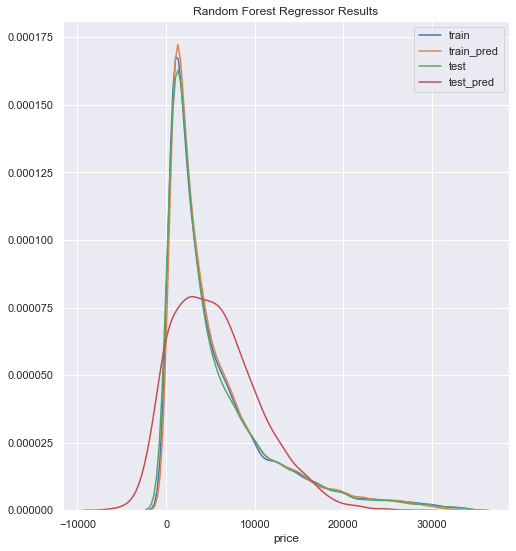

In [96]:
sns.set(rc={'figure.figsize':(8, 9)})
sns.distplot(y_train, bins=100, hist=False, label='train').set_title("Random Forest Regressor Results")
sns.distplot(y_train_predict, bins=100, hist=False, label='train_pred')
sns.distplot(y_test, bins=100, hist=False, label='test')
sns.distplot(y_test_predict, bins=100, hist=False, label='test_pred')
plt.legend()
plt.show()

По оценкам видно, что теперь модель еще лучше предсказывает цену для тренировочного набора данных и гораздо хуже для тестового.

### Подбор гиперпараметров для Random Forest Regressor

In [97]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [98]:
param_grid = {'n_estimators': [i for i in range(1, 200, 5)], 'max_features' : ["auto", "sqrt", "log2"],
'max_depth': [i for i in range(1, 25)], 'min_samples_split' : [2, 5, 10],
'min_samples_leaf': [1, 63, 5]}

In [99]:
from sklearn.model_selection import RandomizedSearchCV

start = time.time()
cv_rs = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=15, cv=5, n_jobs=-1)
cv_rs.fit(X_train, y_train)
end=time.time()
print(end-start)

86.14036917686462


In [100]:
print(cv_rs.best_params_)

{'n_estimators': 61, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 23}


In [101]:
rf_model = RandomForestRegressor(
                                n_estimators=cv_rs.best_params_.get("n_estimators"),
                                min_samples_split = cv_rs.best_params_.get("min_samples_split"),
                                min_samples_leaf = cv_rs.best_params_.get("min_samples_leaf"),
                                max_features = cv_rs.best_params_.get("max_features"),
                                max_depth = cv_rs.best_params_.get("max_depth")
                                  )
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=23, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=61, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [102]:
y_train_predict = rf_model.predict(X_train)
print("Train score: ")
print(calc_metrics(y_train, y_train_predict))

Train score: 
MSE:   1606956.6171740685
RMSE:  1267.6579259303626
R2:    0.9563648916058557
MAE:   773.6992361750058
MedAE: 452.0078844652621
None


In [103]:
y_test_predict = rf_model.predict(X_test)
print("Test score: ")
print(calc_metrics(y_test, y_test_predict))

Test score: 
MSE:   4412728.758976668
RMSE:  2100.6496040455363
R2:    0.8785903808016572
MAE:   1235.9418152104129
MedAE: 685.4385128627089
None


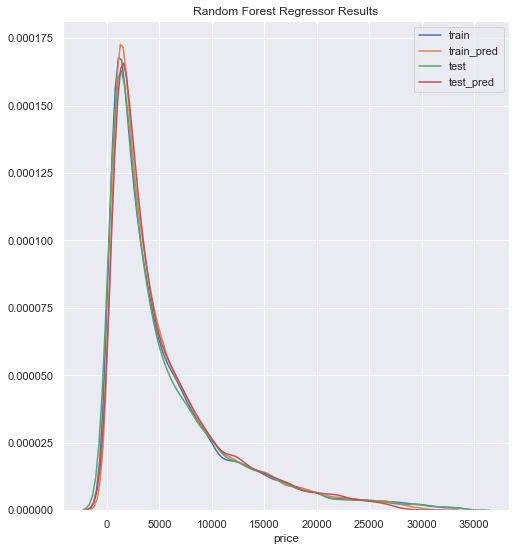

In [104]:
sns.set(rc={'figure.figsize':(8, 9)})
sns.distplot(y_train, bins=100, hist=False, label='train').set_title("Random Forest Regressor Results")
sns.distplot(y_train_predict, bins=100, hist=False, label='train_pred')
sns.distplot(y_test, bins=100, hist=False, label='test')
sns.distplot(y_test_predict, bins=100, hist=False, label='test_pred')
plt.legend()
plt.show()

По сравнению с исходной моделью Random Forest качество модели лишь незначительно повысилось (менее чем на 0,01), но по сравнению с decision trees оценка повысилась значительно

### Feature Selection

In [105]:
importances = rf_model.feature_importances_
importances

array([0.03531093, 0.40101352, 0.03696363, 0.28827423, 0.03494352,
       0.12722543, 0.02603237, 0.04038502, 0.00985135])

In [106]:
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

yearOfRegistration    0.401014
powerPS               0.288274
kilometer             0.127225
brand                 0.040385
gearbox               0.036964
vehicleType           0.035311
model                 0.034944
fuelType              0.026032
notRepairedDamage     0.009851
dtype: float64

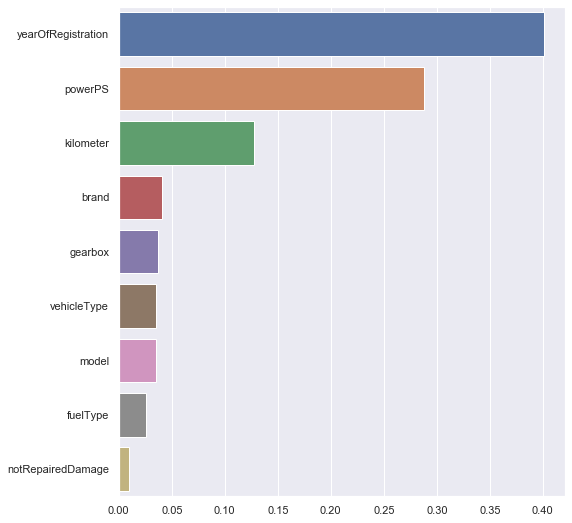

In [107]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

### Тест на значимость коэффициентов регрессии

In [108]:
import statsmodels.api as sm

sm_x = sm.add_constant(X_train)
sm_est = sm.OLS(y_train, sm_x)
estimator = sm_est.fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     4210.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:11:58   Log-Likelihood:            -2.0602e+05
No. Observations:               21415   AIC:                         4.121e+05
Df Residuals:                   21405   BIC:                         4.121e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5688.0625     24

C:\Users\79063\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Видим, что также наибольшую роль в предсказании цены играют год регистрации, мощность и пробег. Также признак модель с вероятностью лишь 10,3% не влияет на целевую переменную (P>|t|), остальные - влияют. R-squared указывает на то, что регрессия объясняет 63,9% изменений в цене.

### PCA

In [110]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA() 
pca.fit_transform(X_train) 
pca.transform(X_test) 
pca.explained_variance_ratio_

array([0.21601763, 0.16539122, 0.13729946, 0.10673355, 0.10427283,
       0.10017332, 0.06650223, 0.0543589 , 0.04925086])

In [111]:
X = encoded_df.drop('price', axis=1).reset_index(drop=True)
y = encoded_df['price'].reset_index(drop=True)
x_scaled = StandardScaler().fit_transform(X)

Возьмем 8 компонент, так как такое количество объясняет не менее 93% информации в данных.

In [113]:
pca = PCA(n_components=8)
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

Shape before PCA:  (30594, 9)
Shape after PCA:  (30594, 8)


In [114]:
pca_df['price'] = y
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,price
0,-1.513423,-0.065721,-0.533865,0.263362,-1.451444,0.158516,-0.684300,0.465576,700
1,2.191727,-0.734317,0.822495,0.333112,-1.266035,1.628504,0.603581,-0.844594,10990
2,-0.978546,-2.183022,-1.933822,0.521396,-0.109035,0.231730,-0.605544,0.054703,7350
3,-1.160635,-0.889186,-0.321003,-0.593575,0.932291,0.376099,0.620666,-0.328094,8800
4,2.345783,0.634003,0.520670,-0.436510,0.222726,-0.252685,-1.053399,0.314287,5500
...,...,...,...,...,...,...,...,...,...
30589,-0.063894,-1.956834,-1.281385,0.788292,-1.046820,0.011655,0.576074,-0.250784,16000
30590,1.141427,0.069412,0.289862,-0.205782,-0.346184,-1.494852,0.319511,-0.420788,10999
30591,0.533518,-0.268891,0.533669,-0.379042,0.175161,-1.334323,0.881249,0.476095,3250
30592,-1.962959,0.442052,0.694826,-1.021698,0.571999,0.827520,0.268305,0.317271,900


In [115]:
(X_train, X_test, y_train, y_test) = train_test_split(pca_df.drop('price', axis=1),
                                            pca_df['price'],
                                            test_size=0.3, 
                                            random_state=5)

In [116]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [117]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [118]:
param_grid = {'n_estimators': [i for i in range(1, 200, 5)], 'max_features' : ["auto", "sqrt", "log2"],
'max_depth': [i for i in range(1, 25)], 'min_samples_split' : [2, 5, 10],
'min_samples_leaf': [1, 63, 5]}

In [119]:
from sklearn.model_selection import RandomizedSearchCV

start = time.time()
cv_rs = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=15, cv=5, n_jobs=-1)
cv_rs.fit(X_train, y_train)
end=time.time()
print(end-start)

169.82166957855225


In [120]:
print(cv_rs.best_params_)

{'n_estimators': 26, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 24}


In [121]:
rf_model = RandomForestRegressor(
                                n_estimators=cv_rs.best_params_.get("n_estimators"),
                                min_samples_split = cv_rs.best_params_.get("min_samples_split"),
                                min_samples_leaf = cv_rs.best_params_.get("min_samples_leaf"),
                                max_features = cv_rs.best_params_.get("max_features"),
                                max_depth = cv_rs.best_params_.get("max_depth")
                                  )
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=24, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=26, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [122]:
y_train_predict = rf_model.predict(X_train)
print("Train score: ")
print(calc_metrics(y_train, y_train_predict))

Train score: 
MSE:   1710610.1977578315
RMSE:  1307.9029771958742
R2:    0.9535502946367306
MAE:   798.2209056886072
MedAE: 460.02047964549047
None


In [123]:
y_test_predict = rf_model.predict(X_test)
print("Test score: ")
print(calc_metrics(y_test, y_test_predict))

Test score: 
MSE:   6236267.377574686
RMSE:  2497.2519651758585
R2:    0.8284184483376278
MAE:   1485.3465004708085
MedAE: 800.4211309523812
None


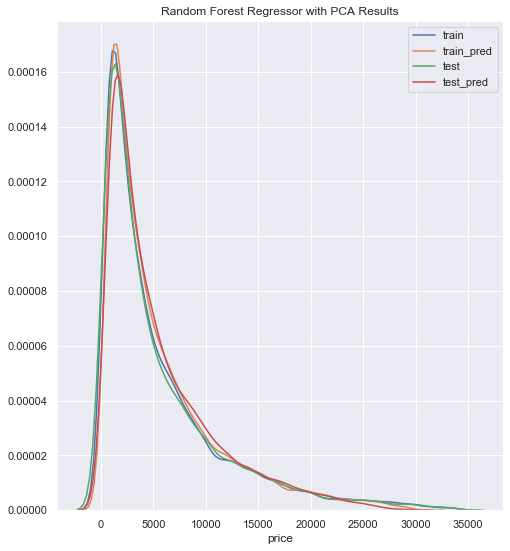

In [124]:
sns.set(rc={'figure.figsize':(8, 9)})
sns.distplot(y_train, bins=100, hist=False, label='train').set_title("Random Forest Regressor with PCA Results")
sns.distplot(y_train_predict, bins=100, hist=False, label='train_pred')
sns.distplot(y_test, bins=100, hist=False, label='test')
sns.distplot(y_test_predict, bins=100, hist=False, label='test_pred')
plt.legend()
plt.show()

После использования PCA метрики предсказания на test худшились, на train улучшились. То есть модель начала подстраиваться под тренировочный набор данных.

### Classification

В разделе классификации будем предсказывать модель автомобиля. Поэтому удалим еще столбцы, которые не должны влиять на модель авто: notRepairedDamage, kilometer, price (до удаления этих признаков качество моделей было хуже).

In [126]:
(X_train_clf, X_test_clf, y_train_clf, y_test_clf) = train_test_split(encoded_df.drop(columns=['model', 'kilometer', 'notRepairedDamage', 'price']),
                                            encoded_df['model'],
                                            test_size=0.3, 
                                            random_state=5)



In [127]:
X_test_clf.shape

(9179, 6)

In [128]:
scaler = StandardScaler()
scaler.fit(X_train_clf)
X_train_clf = pd.DataFrame(scaler.transform(X_train_clf), columns=X_train_clf.columns, index=X_train_clf.index)
X_test_clf = pd.DataFrame(scaler.transform(X_test_clf), columns=X_test_clf.columns, index=X_test_clf.index)

In [129]:
def calc_metrics_clf(true, pred):
    acc_score = np.round(metrics.accuracy_score(true, pred), 5)
    recall_score = np.round(metrics.recall_score(true, pred, average="weighted"), 5)
    precision_score = np.round(metrics.precision_score(true, pred, average="weighted"), 5)
    f1_score = np.round(metrics.f1_score(true, pred, average="weighted"), 5)

    print("Accuracy score:    {}\nRecall score:   {}\nPrecision score::    {}\nF1-score score:   {}".format(acc_score, recall_score, precision_score, f1_score))

Так как мы будем работать с многоклассовой классификацией, более важной будет метрика precision_score (accuracy_score чувствительна к дисбалансу классов)

### Дерево решений

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [131]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train_clf, y_train_clf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [132]:
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
scores_dtree_5 = cross_val_score(dtree_model, X_train_clf, y_train_clf, cv=skf, scoring='f1_micro')
score_dtree_5 = np.mean(scores_dtree_5)
print(score_dtree_5)

C:\Users\79063\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\79063\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\79063\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\79063\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\79063\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\79063\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning:

The least

0.6974737333644643


In [133]:
y_train_predict = dtree_model.predict(X_train_clf)
print("Train score: ")
print(calc_metrics_clf(y_train_clf, y_train_predict))
y_test_predict = dtree_model.predict(X_test_clf)
print("Test score: ")
print(calc_metrics_clf(y_test_clf, y_test_predict))

Train score: 
Accuracy score:    0.90082
Recall score:   0.90082
Precision score::    0.90343
F1-score score:   0.89864
None
Test score: 
Accuracy score:    0.70846
Recall score:   0.70846
Precision score::    0.70565
F1-score score:   0.70224
None


C:\Users\79063\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\79063\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Оценка на тестовом наборе значительно хуже, чем на тренировочном.

#### KNN classifier

In [134]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(X_train_clf, y_train_clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [135]:
y_train_predict = knn_model.predict(X_train_clf)
print("Train score: ")
print(calc_metrics_clf(y_train_clf, y_train_predict))
y_test_predict = knn_model.predict(X_test_clf)
print("Test score: ")
print(calc_metrics_clf(y_test_clf, y_test_predict))

Train score: 
Accuracy score:    0.60719
Recall score:   0.60719
Precision score::    0.59734
F1-score score:   0.58073
None


C:\Users\79063\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Test score: 
Accuracy score:    0.52816
Recall score:   0.52816
Precision score::    0.49555
F1-score score:   0.49691
None


C:\Users\79063\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\79063\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Результат KNN classifier оказался хуже чем у дерева решений.

### Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train_clf, y_train_clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [141]:
y_train_predict = rfc_model.predict(X_train_clf)
print("Train score: ")
print(calc_metrics_clf(y_train_clf, y_train_predict))
y_test_predict = rfc_model.predict(X_test_clf)
print("Test score: ")
print(calc_metrics_clf(y_test_clf, y_test_predict))

Train score: 
Accuracy score:    0.90082
Recall score:   0.90082
Precision score::    0.90245
F1-score score:   0.89881
None
Test score: 
Accuracy score:    0.7199
Recall score:   0.7199
Precision score::    0.71378
F1-score score:   0.71135
None


C:\Users\79063\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\79063\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Видно, что результаты гораздо лучше, но модель переобучилась, постараемся подобрать гиперпараметры при помощи RandomizedSearchCV.

In [142]:
param_grid = {'n_estimators': [i for i in range(1, 200, 5)], 'max_features' : ["auto", "sqrt", "log2"],
'max_depth': [i for i in range(1, 20)], 'min_samples_split' : [2, 5, 10],
'min_samples_leaf': [1, 63, 5]}

In [143]:
start = time.time()
cv_rs = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=50, cv=10, n_jobs=-1)
cv_rs.fit(X_train_clf, y_train_clf)
end=time.time()
print(end-start)

500.08637595176697


In [144]:
print(cv_rs.best_params_)

{'n_estimators': 56, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 19}


In [145]:
rfc_model = RandomForestClassifier(
                                n_estimators=cv_rs.best_params_.get("n_estimators"),
                                min_samples_split = cv_rs.best_params_.get("min_samples_split"),
                                min_samples_leaf = cv_rs.best_params_.get("min_samples_leaf"),
                                max_features = cv_rs.best_params_.get("max_features"),
                                max_depth = cv_rs.best_params_.get("max_depth")
                                  )
rfc_model.fit(X_train_clf, y_train_clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=19, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=56,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [146]:
y_train_predict = rfc_model.predict(X_train_clf)
print("Train score: ")
print(calc_metrics_clf(y_train_clf, y_train_predict))
y_test_predict = rfc_model.predict(X_test_clf)
print("Test score: ")
print(calc_metrics_clf(y_test_clf, y_test_predict))

Train score: 
Accuracy score:    0.77119
Recall score:   0.77119
Precision score::    0.77463
F1-score score:   0.75304
None


C:\Users\79063\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Test score: 
Accuracy score:    0.70803
Recall score:   0.70803
Precision score::    0.70619
F1-score score:   0.6844
None


C:\Users\79063\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



После подбора гиперпараметров переобучение стало не таким явным, но все оценки на тренировочном и тестовом наборе снизились.

### Feature Selection

In [147]:
importances = rfc_model.feature_importances_
importances

array([0.13343251, 0.14664   , 0.01829637, 0.22049196, 0.02536388,
       0.45577528])

In [148]:
importances = pd.Series(rfc_model.feature_importances_, index=X_train_clf.columns).sort_values(ascending=False)
importances

brand                 0.455775
powerPS               0.220492
yearOfRegistration    0.146640
vehicleType           0.133433
fuelType              0.025364
gearbox               0.018296
dtype: float64

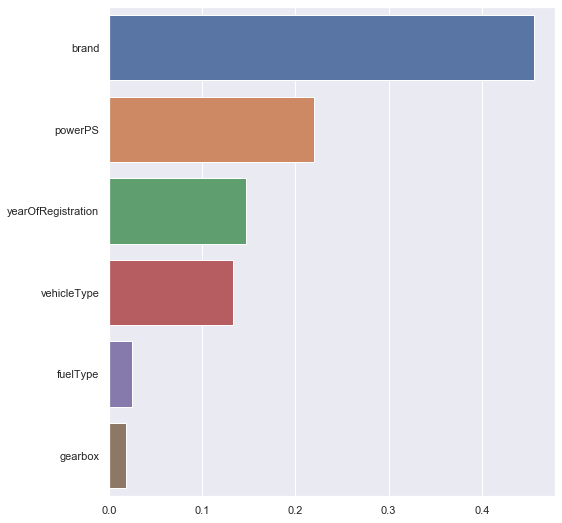

In [149]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

Логично, что на определение модели автомобиля больше всего влияют бренд, мощность, год регистрации и тип авто. Практически в равной степени влияет тип топлива и тип коробки передач.

### Общий вывод

В задаче регрессии (предсказание цены) успешнее всего сработала модель ансамбля решающих деревьев с R2 score равным 0.87. Большую роль в предсказании цены играли - год регистрации, мощность и пробег, что было уже замечено при построении графиков. С использованием PCA (8 компонент) модель random forest regressor начала переобучаться. <br>
При работе с классификацией (предсказание модели) лучше всего сработал random forest classifier c precision равным 71%. Большую роль в предсказании модели играли такие признаки, как - бренд и мощность. Возможно для повышения оценки предсказания модели автомобиля требуются и другие описания авто.